### Import

In [1]:
import sys
sys.path.append('../code')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import featureSpaceProcessing
import regression_per_task

### Load data

In [3]:
all_feature_dfs = pickle.load(open('../pickle_data/feature_dataframes/all_features_restructured.p', 'rb'))

In [4]:
task_no = 0
all_feature_dfs[task_no].head()

,elbowL-elbowR,elbowL-handL,elbowR-handL,handR-elbowL,handR-elbowR,handR-handL,handR-neck,handR-shoulderL,handR-wristL,handR-wristR,...,max_speed,mean_speed,median_speed,min_speed,subject,extraversion,agreeableness,conscientiousness,neuroticism,openness_to_experience
0,0.182165,0.190942,0.184052,0.401305,0.572954,0.261546,0.210522,0.339604,0.260754,0.517057,...,0.223263,0.492711,0.591914,1.000000,subject6,1.0,1.000000,1.0,0.500000,0.0
1,0.284290,0.152737,0.167712,0.458064,0.774156,0.303709,0.538086,0.500952,0.424659,0.519347,...,0.364316,0.620131,0.535475,0.507534,subject11,0.8,0.400000,1.0,0.000000,0.4
2,0.237931,0.231667,0.235922,0.547554,0.705740,0.464563,0.300659,0.358582,0.756410,0.773800,...,0.331960,0.587738,0.338909,0.282646,subject9,1.0,0.000000,1.0,1.000000,1.0
3,0.323728,0.290957,0.276506,0.430111,0.712594,0.418047,0.311705,0.417616,0.508485,0.505478,...,0.100439,0.032661,0.023508,0.055616,subject8,0.0,0.666667,1.0,0.666667,0.0
4,0.224147,0.460610,0.357286,0.349431,0.576618,0.374014,0.239067,0.267934,0.443515,0.649480,...,0.465448,0.263648,0.086479,0.050561,subject4,0.0,1.000000,0.0,0.000000,0.0


### Find top correlated features

In [5]:
big5 = ['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
feature_cols = [col for col in list(all_feature_dfs[task_no].columns) if not col in big5+['subject', 'index', 'task', 5]]
trait_no = 0

In [6]:
feature_cols

['elbowL-elbowR',
 'elbowL-handL',
 'elbowR-handL',
 'handR-elbowL',
 'handR-elbowR',
 'handR-handL',
 'handR-neck',
 'handR-shoulderL',
 'handR-wristL',
 'handR-wristR',
 'head-elbowL',
 'head-elbowR',
 'head-handL',
 'head-handR',
 'head-neck',
 'head-shoulderL',
 'head-spineShoulder',
 'head-wristL',
 'head-wristR',
 'neck-elbowL',
 'neck-elbowR',
 'neck-handL',
 'neck-wristL',
 'shoulderL-elbowL',
 'shoulderL-elbowR',
 'shoulderL-handL',
 'shoulderL-neck',
 'shoulderL-wristL',
 'shoulderL-wristR',
 'shoulderR-elbowL',
 'shoulderR-elbowR',
 'shoulderR-handL',
 'shoulderR-handR',
 'shoulderR-head',
 'shoulderR-neck',
 'shoulderR-shoulderL',
 'shoulderR-spineShoulder',
 'shoulderR-wristL',
 'shoulderR-wristR',
 'spineShoulder-elbowL',
 'spineShoulder-elbowR',
 'spineShoulder-handL',
 'spineShoulder-handR',
 'spineShoulder-neck',
 'spineShoulder-shoulderL',
 'spineShoulder-wristL',
 'spineShoulder-wristR',
 'wristL-elbowL',
 'wristL-elbowR',
 'wristL-handL',
 'wristR-elbowL',
 'wristR-

In [7]:
featureSpaceProcessing.top_correlated_features(df = all_feature_dfs[task_no],
                                               feature_columns = feature_cols,
                                               correlate_to = big5[trait_no],
                                               threshold = 10,
                                               remove_from_feature_columns = big5)

['ampl_mean_spineMid-handL',
 'ampl_mean_spineMid-wristL',
 'ampl_mean_spineMid-handR',
 'ampl_max_neck-handL',
 'min_speed',
 'ampl_max_spineMid-handL',
 'shoulderL-handL',
 'ampl_min_spineMid-handL',
 'shoulderL-wristL',
 'ampl_max_neck-wristL']

In [8]:
corr_cols = featureSpaceProcessing.top_correlated_features(df = all_feature_dfs[task_no],
                                               feature_columns = feature_cols,
                                               correlate_to = big5[trait_no],
                                               threshold = 0.33,
                                               remove_from_feature_columns = big5)

In [9]:
#-np.sort(-all_feature_dfs[0][feature_cols].var())

#### Explore correlated columns

#### Variance

In [10]:
all_feature_dfs[0].var()[corr_cols]

ampl_mean_spineMid-handL     0.024865
ampl_mean_spineMid-wristL    0.024863
ampl_mean_spineMid-handR     0.063238
ampl_max_neck-handL          0.044706
dtype: float64

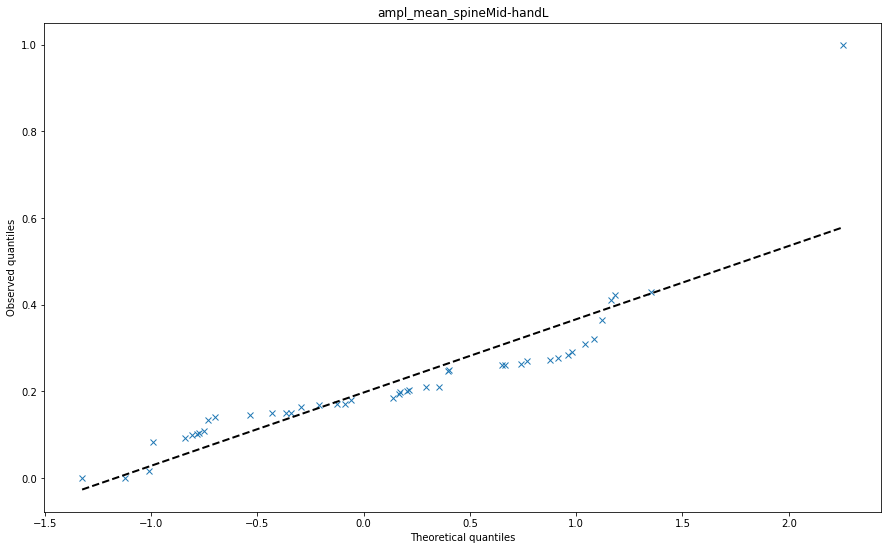

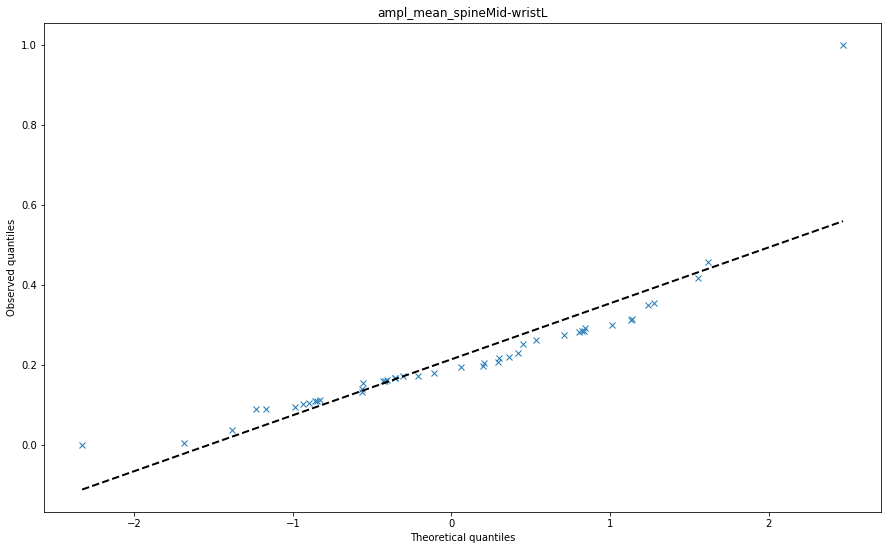

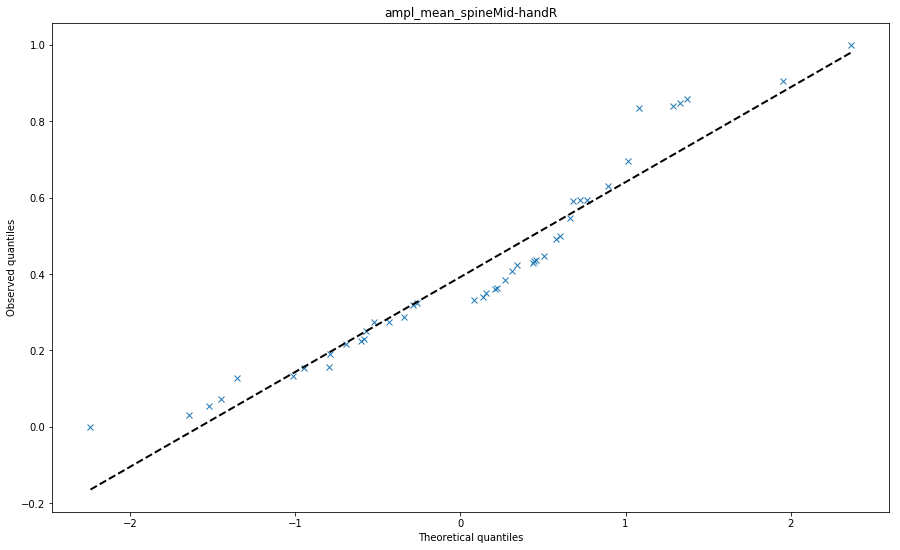

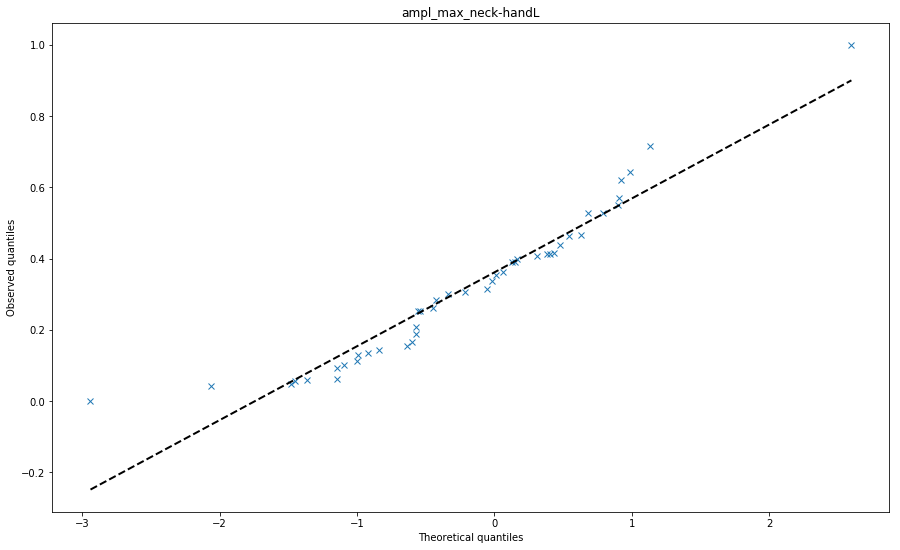

In [11]:
for i, feature in enumerate(corr_cols):
    plt.figure(figsize=(15,9))
    x = np.sort(all_feature_dfs[task_no][feature])
    #print task_no, feature
    norm=np.random.normal(0,1,len(x))
    norm.sort()
    #plt.subplot(n_plot_rows, n_plot_columns, i+1)
    #plt.plot(n_plot_rows, n_plot_columns, i+1)    
    plt.plot(norm, x, 'x')
    z = np.polyfit(norm,x, 1)
    #print z
    p = np.poly1d(z)
    plt.plot(norm,p(norm),"k--", linewidth=2)
    plt.title('{0}'.format(feature))
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Observed quantiles")
    plt.show()

#### Correlation

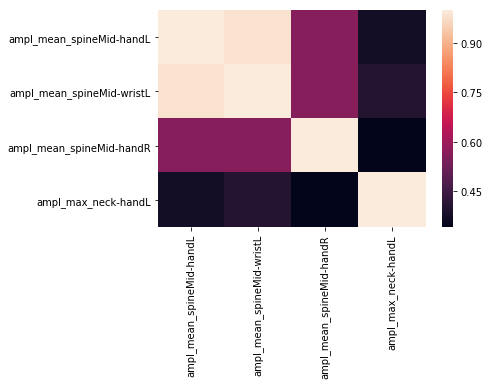

In [12]:
sns.heatmap(all_feature_dfs[0][corr_cols].corr())
plt.show()

### Fitting model with correlation based selection

In [13]:
path_to_pickle = '../pickle_data/feature_dataframes/all_features_restructured.p'
test_size = 0.2

#### Baseline (no feature selection)

/home/morris/anaconda3/envs/mrp/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.07012039 -0.09501357  0.01470349 -0.58402261 -0.28859756]
[-0.01247829 -0.3718939  -0.38023551 -0.96149764 -0.0029513 ]
[  3.98013241e-03  -3.74686277e-01  -1.82439678e-02  -5.58935761e-01
  -5.19296244e-04]
[-0.00363209  0.00245142 -0.37858065 -0.55980715  0.45104972]
[-0.00256185 -0.39517025 -0.33040687 -0.219602    0.11104857]
[ 0.11918058 -0.12937166 -0.72194419  0.08867284  0.08175818]



['Ada_B' 'Gauss_P' 'KNN' 'Gauss_P' 'Gauss_P']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Gauss_P' 'Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R' 'KNN']
['Bayes_R' 'Bayes_R' 'Ada_B' 'SVM' 'Gauss_P']
['Gauss_P' 'SVM' 'Gauss_P' 'KNN' 'Gauss_P']


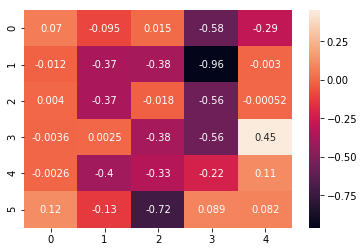

In [14]:
models_dict = regression_per_task.main(path_to_pickle=path_to_pickle,
                         test_size = test_size,
                         print_extended=False,
                         pca=False,
                         n_pca_var=None,
                         n_pca_cor=None,
                         variance_features=None)

#### Try different correlation thresholds

In [17]:
thresholds = [0.3, 0.33, 0.35, 0.4]
n_min_corr_vars = [1, 3, 5, 7, 9, 10]
only_normal_dist = [True, False]

**********
Minimum correlation variables: 1
Correlation threshold: 0.3
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.47408012 -0.13276858 -0.08264574 -0.55143356 -0.12188147]
[ 0.04806801 -0.37572989 -0.17863271 -0.6335424  -0.09699078]
[ 0.14130084 -0.20310648 -0.3793921  -0.73746067  0.26375691]
[ -2.79135055e-02   1.08547661e-01  -1.06519571e-01  -4.41314759e-01
  -3.47235194e-04]
[ 0.0213091   0.03552163 -0.32562091  0.35416667  0.1720368 ]
[ 0.02506877 -0.11171713 -0.37912084 -0.30908712  0.44611701]



['KNN' 'ANN' 'SVM' 'Bayes_R' 'ANN']
['Ada_B' 'Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R']
['Lin_Reg' 'ANN' 'Bayes_R' 'ANN' 'KNN']
['ANN' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['Lin_Reg' 'SVM' 'KNN' 'KNN' 'SVM']
['ANN' 'SVM' 'Bayes_R' 'SVM' 'Ada_B']


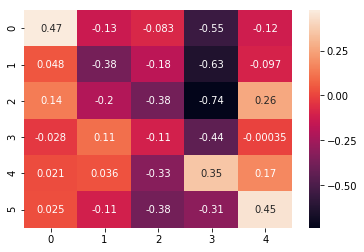

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.07225332 -0.17510805  0.15904673 -0.01805757  0.13428099]
[-0.04672829 -0.0869004   0.09161181  0.04853454  0.13373419]
[ 0.01487803 -0.12865913  0.01053297  0.15757883  0.02024203]
[-0.1286842  -0.09681718 -0.02432278  0.0254722   0.03474054]
[ 0.08411458 -0.10054783  0.32301196  0.01993878 -0.01141158]
[ 0.09189199 -0.06557975  0.50005476  0.14109346 -0.01012867]



['ANN' 'ANN' 'Lin_Reg' 'Bayes_R' 'SVM']
['ANN' 'ANN' 'SVM' 'ANN' 'Ada_B']
['Ada_B' 'Bayes_R' 'Lin_Reg' 'ANN' 'ANN']
['Bayes_R' 'Gauss_P' 'ANN' 'Gauss_P' 'ANN']
['Gauss_P' 'Bayes_R' 'KNN' 'Lin_Reg' 'Bayes_R']
['KNN' 'Lin_Reg' 'Ada_B' 'Ada_B' 'Bayes_R']


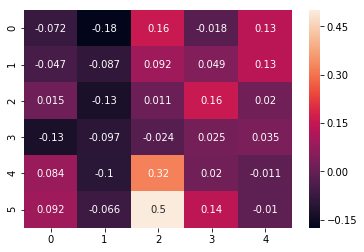

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.13137831 -0.08717457 -0.2041893  -0.31988338 -0.01978202]
[-0.27359026 -0.32034945 -0.17863271 -0.6335424  -0.09699078]
[-0.09035006  0.38063225 -0.27824611 -0.22530864 -0.01102421]
[  1.12659311e-01   1.08547661e-01   3.69727128e-02  -4.54165248e-01
  -3.47235194e-04]
[-0.00575446  0.06077757 -0.24703682  0.24579539  0.33605105]
[-0.05794529  0.01734525 -0.37912084 -0.30908712  0.02559989]



['Ada_B' 'ANN' 'ANN' 'Lin_Reg' 'ANN']
['Bayes_R' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'Ada_B' 'KNN' 'Bayes_R']
['ANN' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'SVM' 'SVM' 'Ada_B']
['KNN' 'Ada_B' 'Bayes_R' 'SVM' 'Lin_Reg']


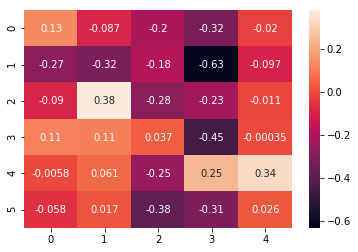

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.07751381 -0.24431017  0.08587949  0.03913015  0.0015188 ]
[ 0.37105226 -0.10142519  0.09161181  0.04129559  0.07498638]
[-0.05395513 -0.12865913  0.01053297 -0.01998877  0.00670539]
[-0.1286842  -0.09681718  0.01157292  0.0254722   0.02636731]
[ 0.00749355 -0.1262083  -0.01004844 -0.01753637 -0.00727597]
[ 0.1131968   0.0481028   0.28435008  0.23898606 -0.01071193]



['ANN' 'ANN' 'Lin_Reg' 'KNN' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'ANN' 'SVM']
['Gauss_P' 'Bayes_R' 'Lin_Reg' 'Bayes_R' 'ANN']
['Bayes_R' 'Gauss_P' 'ANN' 'Gauss_P' 'Lin_Reg']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'Lin_Reg']
['SVM' 'Gauss_P' 'SVM' 'Ada_B' 'Bayes_R']


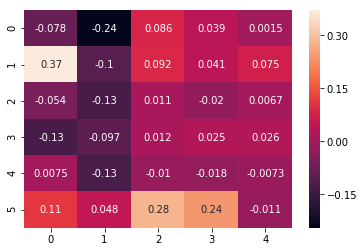

++++++++++
----------
Correlation threshold: 0.33
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.47408012 -0.21670865 -0.08264574 -0.47940147 -0.14743435]
[ 0.06081479 -0.18536141 -0.17863271 -0.6335424  -0.09699078]
[ 0.14130084 -0.30448032 -0.3793921  -0.8303812   0.26375691]
[  3.65790201e-02   1.08547661e-01   2.64122150e-02  -5.07136038e-01
  -3.47235194e-04]
[ 0.0213091   0.03552163 -0.32562091  0.35416667  0.1720368 ]
[ 0.02578687 -0.11171713 -0.37912084 -0.30908712  0.02559989]



['KNN' 'ANN' 'SVM' 'ANN' 'ANN']
['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['Lin_Reg' 'Gauss_P' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['Lin_Reg' 'SVM' 'KNN' 'KNN' 'SVM']
['Ada_B' 'SVM' 'Bayes_R' 'SVM' 'Lin_Reg']


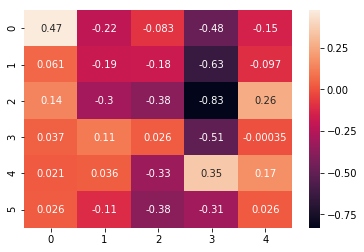

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.00652414 -0.08346674  0.12989167  0.04120507 -0.02403854]
[-0.02812824 -0.10142519  0.09161181  0.02780783  0.07498638]
[ 0.04524072 -0.12865913  0.01053297  0.19896715 -0.02696294]
[-0.1286842  -0.09681718 -0.00213673  0.0254722   0.03121769]
[ 0.08411458 -0.10054783  0.3597224   0.12792919 -0.00827402]
[ 0.09189199 -0.06557975  0.41874675  0.08329425 -0.00487853]



['ANN' 'ANN' 'SVM' 'Lin_Reg' 'ANN']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'SVM']
['Ada_B' 'Bayes_R' 'Lin_Reg' 'ANN' 'ANN']
['Bayes_R' 'Gauss_P' 'ANN' 'Gauss_P' 'ANN']
['Gauss_P' 'Bayes_R' 'Ada_B' 'ANN' 'ANN']
['KNN' 'Lin_Reg' 'Ada_B' 'Bayes_R' 'ANN']


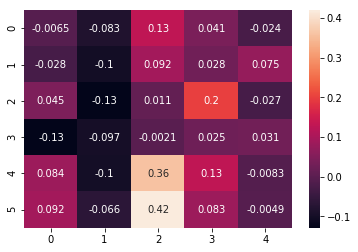

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.14169986 -0.29747555 -0.16276867 -0.31988338 -0.37408654]
[ 0.12299208 -0.09884143 -0.35132876 -0.11419753  0.02878902]
[-0.07876388  0.38063225 -0.37395442 -0.22530864 -0.01102421]
[  3.92750832e-02   1.08547661e-01  -1.39418968e-01  -5.15409170e-01
  -3.47235194e-04]
[-0.02803722  0.06077757 -0.24703682  0.24579539  0.10016575]
[-0.05794529 -0.11171713 -0.37912084 -0.30908712  0.25087213]



['Bayes_R' 'ANN' 'Ada_B' 'Lin_Reg' 'ANN']
['KNN' 'SVM' 'Lin_Reg' 'KNN' 'Gauss_P']
['ANN' 'SVM' 'KNN' 'KNN' 'Bayes_R']
['ANN' 'SVM' 'SVM' 'ANN' 'Bayes_R']
['Bayes_R' 'SVM' 'SVM' 'SVM' 'KNN']
['KNN' 'SVM' 'Bayes_R' 'SVM' 'Ada_B']


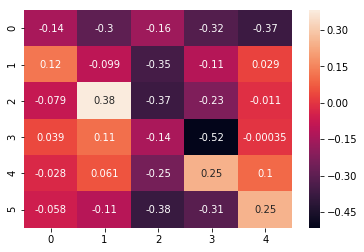

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.258068   -0.05615342  0.08587949  0.05976918 -0.00363911]
[ 0.37105226 -0.07501678  0.09161181  0.05690662  0.07498638]
[-0.22089723 -0.12865913  0.01053297  0.05483189  0.01785827]
[-0.1286842  -0.09681718  0.00122373  0.0254722   0.04117079]
[-0.07153028 -0.1262083  -0.01638626 -0.01872641  0.00486003]
[ 0.1131968   0.0481028   0.28435008  0.13353368 -0.01071193]



['ANN' 'ANN' 'Lin_Reg' 'Ada_B' 'ANN']
['KNN' 'ANN' 'SVM' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'Lin_Reg' 'ANN' 'ANN']
['Bayes_R' 'Gauss_P' 'ANN' 'Gauss_P' 'ANN']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['SVM' 'Gauss_P' 'SVM' 'Ada_B' 'Bayes_R']


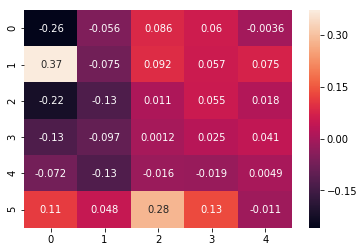

++++++++++
----------
Correlation threshold: 0.35
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.47408012 -0.25571699 -0.08264574 -0.55143356 -0.03301075]
[ 0.12407285 -0.20469042 -0.17863271 -0.6335424  -0.03060377]
[ 0.14130084 -0.25456396 -0.3793921  -0.70185931  0.26375691]
[  5.05812784e-02   1.08547661e-01  -1.39418968e-01  -9.18150495e-01
  -3.47235194e-04]
[ 0.02188736  0.03552163 -0.32562091  0.35416667  0.1720368 ]
[ 0.00355571 -0.11171713 -0.37912084 -0.30908712  0.29771821]



['KNN' 'ANN' 'SVM' 'Bayes_R' 'ANN']
['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'ANN']
['Lin_Reg' 'ANN' 'Bayes_R' 'ANN' 'KNN']
['ANN' 'SVM' 'SVM' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'KNN' 'SVM']
['Ada_B' 'SVM' 'Bayes_R' 'SVM' 'Ada_B']


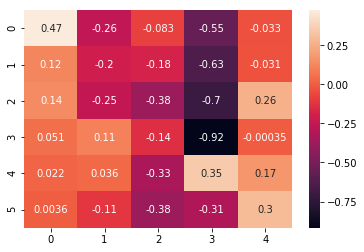

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.11130732 -0.08783056  0.12989167  0.04120507  0.00213728]
[-0.07024299 -0.10142519  0.09161181  0.02151022  0.07498638]
[-0.00931077 -0.12865913  0.01053297 -0.01788212  0.02197453]
[-0.05067055 -0.09681718  0.06949803  0.0254722   0.02636731]
[ 0.08411458 -0.10054783  0.33598246  0.05354664 -0.00243553]
[ 0.09189199 -0.06557975  0.55584488  0.08329425 -0.01012867]



['ANN' 'ANN' 'SVM' 'Lin_Reg' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'Lin_Reg' 'Ada_B' 'ANN']
['Bayes_R' 'Gauss_P' 'Ada_B' 'Gauss_P' 'Lin_Reg']
['Gauss_P' 'Bayes_R' 'Ada_B' 'ANN' 'ANN']
['KNN' 'Lin_Reg' 'Ada_B' 'Bayes_R' 'Bayes_R']


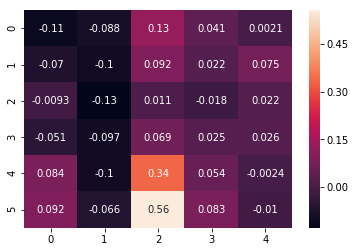

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.21677341 -0.26287274 -0.10911072 -0.31988338  0.1499253 ]
[ 0.12299208 -0.09884143 -0.35132876 -0.11419753  0.02878902]
[-0.02977218  0.30387193 -0.37918176 -0.54330183  0.02105254]
[  2.74636358e-02   1.08547661e-01  -2.02869543e-02  -6.63864889e-01
  -3.47235194e-04]
[-0.00056387  0.06077757 -0.21372177  0.24579539  0.19281063]
[-0.00258277 -0.11171713 -0.37912084 -0.30908712  0.0819971 ]



['Bayes_R' 'ANN' 'ANN' 'Lin_Reg' 'ANN']
['KNN' 'SVM' 'Lin_Reg' 'KNN' 'Gauss_P']
['Ada_B' 'SVM' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'Ada_B' 'SVM' 'Ada_B']
['ANN' 'SVM' 'Bayes_R' 'SVM' 'Ada_B']


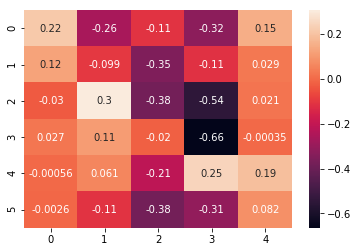

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.15296714 -0.12720081  0.10958067  0.03913015  0.00626677]
[ 0.37105226 -0.10142519  0.09161181  0.0072947   0.07498638]
[-0.26605882  0.01196238  0.01053297  0.36672198  0.01017964]
[-0.05067055 -0.09681718  0.00405086  0.0254722   0.02636731]
[-0.02827683 -0.1262083  -0.01938181 -0.0026494  -0.00295549]
[ 0.1131968   0.0481028   0.33885115  0.10059912 -0.009024  ]



['ANN' 'ANN' 'ANN' 'KNN' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'Lin_Reg' 'SVM']
['KNN' 'ANN' 'Lin_Reg' 'ANN' 'ANN']
['Bayes_R' 'Gauss_P' 'ANN' 'Gauss_P' 'Lin_Reg']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'ANN']
['SVM' 'Gauss_P' 'Ada_B' 'Lin_Reg' 'ANN']


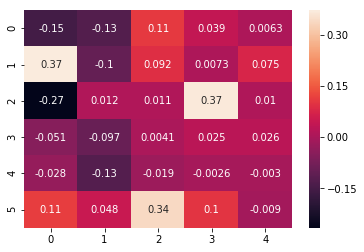

++++++++++
----------
Correlation threshold: 0.4
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.47408012 -0.11248763 -0.08264574 -0.55143356 -0.0216861 ]
[ 0.35431611 -0.16516522 -0.17863271 -0.6335424  -0.09669264]
[ 0.14130084 -0.30448032 -0.3793921  -0.8303812   0.26375691]
[  3.55221873e-02   1.08547661e-01   1.37883966e-01  -8.32406188e-01
  -3.47235194e-04]
[ 0.0213091   0.03552163 -0.32562091  0.35416667  0.1720368 ]
[ 0.02790333 -0.11171713 -0.37912084 -0.30908712  0.33123585]



['KNN' 'ANN' 'SVM' 'Bayes_R' 'ANN']
['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'ANN']
['Lin_Reg' 'Gauss_P' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['Lin_Reg' 'SVM' 'KNN' 'KNN' 'SVM']
['ANN' 'SVM' 'Bayes_R' 'SVM' 'Ada_B']


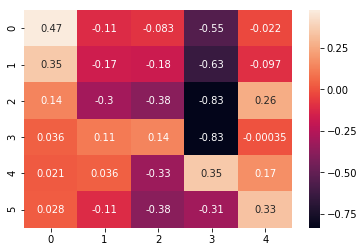

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.07402236  0.00201758  0.0625654   0.0243003   0.0248128 ]
[-0.07024299 -0.10142519  0.09161181  0.0072947   0.07498638]
[-0.02270988 -0.12865913  0.02092516  0.23684659 -0.01113959]
[ 0.12618996 -0.06526475 -0.00130534  0.031678    0.00617363]
[ 0.08411458 -0.10054783  0.32301196  0.06114797  0.02384913]
[ 0.09189199 -0.06557975  0.44082938  0.08329425 -0.01012867]



['ANN' 'Lin_Reg' 'ANN' 'ANN' 'SVM']
['KNN' 'Bayes_R' 'SVM' 'Lin_Reg' 'SVM']
['Bayes_R' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['SVM' 'Lin_Reg' 'ANN' 'ANN' 'ANN']
['Gauss_P' 'Bayes_R' 'KNN' 'ANN' 'ANN']
['KNN' 'Lin_Reg' 'Ada_B' 'Bayes_R' 'Bayes_R']


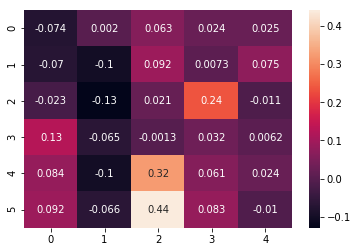

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.02827134  0.01851978 -0.32199039 -0.48726509  0.05914703]
[ 0.12299208 -0.09884143 -0.30778729 -0.11419753  0.02878902]
[-0.03158745  0.08153428 -0.24264402 -0.42518829  0.21839403]
[ -3.34746180e-03   1.08547661e-01  -4.72372465e-02  -4.25361624e-01
  -3.47235194e-04]
[-0.02803722  0.06077757 -0.24703682  0.24579539  0.35333755]
[-0.01029481 -0.16514458  0.270941   -0.00322724  0.06313448]



['ANN' 'SVM' 'Lin_Reg' 'Lin_Reg' 'KNN']
['KNN' 'SVM' 'ANN' 'KNN' 'Gauss_P']
['ANN' 'ANN' 'Ada_B' 'Gauss_P' 'SVM']
['Bayes_R' 'SVM' 'Ada_B' 'ANN' 'Bayes_R']
['Bayes_R' 'SVM' 'SVM' 'SVM' 'Ada_B']
['ANN' 'ANN' 'Ada_B' 'SVM' 'SVM']


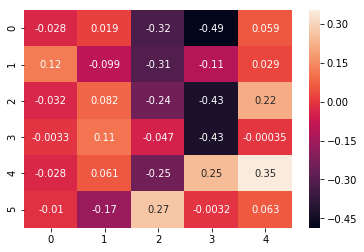

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.07778093 -0.12328605  0.02277371  0.07769855  0.20620117]
[-0.09176054 -0.06624334 -0.01946095 -0.02796975 -0.010181  ]
[-0.13661645 -0.09618122  0.0419031  -0.0039225   0.03098324]
[ 0.12618996 -0.04278353  0.00190785  0.02216856  0.01823532]
[-0.01136472 -0.1262083  -0.01419669 -0.0241047  -0.00727597]
[ 0.1131968   0.0481028   0.28435008  0.17295405  0.02087555]



['ANN' 'ANN' 'Lin_Reg' 'Lin_Reg' 'KNN']
['ANN' 'ANN' 'Bayes_R' 'ANN' 'Bayes_R']
['ANN' 'Ada_B' 'ANN' 'ANN' 'ANN']
['SVM' 'ANN' 'ANN' 'Bayes_R' 'ANN']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'Lin_Reg']
['SVM' 'Gauss_P' 'SVM' 'Ada_B' 'ANN']


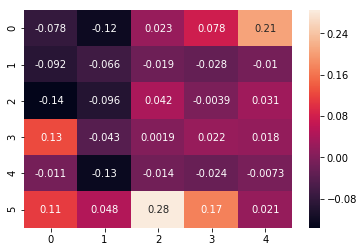

++++++++++
----------
**********
**********
Minimum correlation variables: 3
Correlation threshold: 0.3
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.21587122  0.11103697 -0.36020969 -0.8979561  -0.08354072]
[ 0.39180816 -0.03492323 -0.36014163 -0.16004768  0.00770569]
[ 0.08003743 -0.16236601 -0.38300781 -0.22201613  0.06559886]
[ 0.08701393  0.18674535 -0.14763337 -0.23929792  0.20080317]
[ 0.03160613  0.16059352 -0.15915596 -0.27392607  0.46966857]
[ 0.35038451  0.03770228 -0.44953735 -0.54166272  0.11399943]



['SVM' 'ANN' 'Ada_B' 'ANN' 'Bayes_R']
['Ada_B' 'ANN' 'Lin_Reg' 'SVM' 'ANN']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'ANN' 'ANN']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'SVM']
['Ada_B' 'Lin_Reg' 'Bayes_R' 'Bayes_R' 'Lin_Reg']


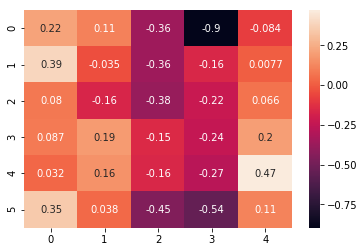

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.04561289 -0.14777183  0.21466944  0.14588908  0.09189983]
[-0.02278219 -0.11971665  0.10030916  0.10108804  0.08162202]
[-0.01561916 -0.1010778   0.10525786  0.12230853 -0.061605  ]
[-0.10299312 -0.099345   -0.05259823  0.06747144  0.0361801 ]
[ 0.00802136 -0.10090522  0.36033258  0.17544314  0.25299415]
[ 0.26300101 -0.09882236  0.3699992   0.51826996 -0.02207364]



['ANN' 'Bayes_R' 'Lin_Reg' 'Lin_Reg' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'Lin_Reg' 'Lin_Reg']
['Ada_B' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'SVM' 'KNN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'Bayes_R']


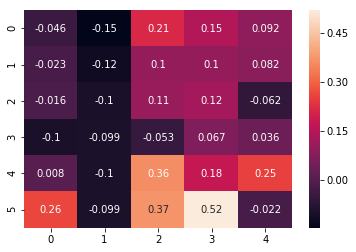

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.29929811 -0.13851176  0.12640268 -0.33632974 -0.11991868]
[-0.0965868  -0.07698585  0.02438928 -0.54529559 -0.01071191]
[-0.4191003   0.38063225 -0.32904    -0.22530864 -0.01107556]
[ 0.0336802   0.18674535 -0.14763337 -0.57506643  0.10928391]
[-0.0165049   0.16847793  0.08004129 -0.54155873  0.2643675 ]
[ 0.00448698 -0.01820174 -0.3969115  -0.37768268  0.02201508]



['Ada_B' 'ANN' 'KNN' 'Lin_Reg' 'ANN']
['ANN' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'Ada_B' 'KNN' 'Bayes_R']
['ANN' 'SVM' 'SVM' 'ANN' 'SVM']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'SVM']
['Ada_B' 'Lin_Reg' 'Bayes_R' 'Lin_Reg' 'Lin_Reg']


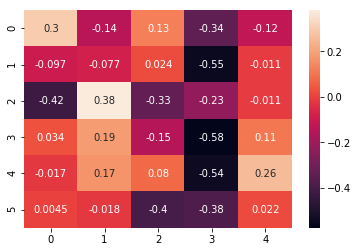

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.02711176 -0.08789875  0.0989349  -0.01834484  0.00888328]
[ 0.37105226  0.01204019  0.08800593 -0.01772822  0.04594287]
[-0.05395513 -0.1009657   0.13335383  0.05557488 -0.04079747]
[-0.05852068  0.05693785 -0.05259823 -0.01809821  0.1089895 ]
[-0.0473841  -0.11940356  0.19272079  0.12835239 -0.01015479]
[ 0.07302143 -0.03992165  0.2954189   0.24681375 -0.00992764]



['ANN' 'ANN' 'ANN' 'Bayes_R' 'Ada_B']
['KNN' 'ANN' 'Ada_B' 'Bayes_R' 'ANN']
['Gauss_P' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['ANN' 'ANN' 'Bayes_R' 'Bayes_R' 'ANN']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'Bayes_R']
['KNN' 'Lin_Reg' 'SVM' 'Ada_B' 'ANN']


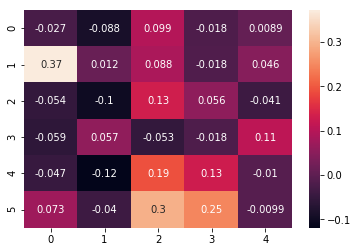

++++++++++
----------
Correlation threshold: 0.33
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.40573173 -0.20374951 -0.44659523 -0.69293011 -0.08354072]
[ 0.23742062 -0.33425102 -0.22338525 -0.16004768 -0.14730981]
[ 0.08003743 -0.36891811 -0.38300781 -0.1275483   0.06559886]
[ 0.02656404  0.18674535 -0.14763337 -0.96672482  0.10928391]
[-0.02853634  0.16059352 -0.15915596 -0.38520061  0.46966857]
[ 0.21234901  0.14506536 -0.44953735 -0.54166272  0.11399943]



['Ada_B' 'ANN' 'Ada_B' 'ANN' 'Bayes_R']
['Ada_B' 'Lin_Reg' 'Ada_B' 'SVM' 'Bayes_R']
['KNN' 'Bayes_R' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'ANN' 'SVM']
['Bayes_R' 'SVM' 'Bayes_R' 'Lin_Reg' 'SVM']
['Ada_B' 'Ada_B' 'Bayes_R' 'Bayes_R' 'Lin_Reg']


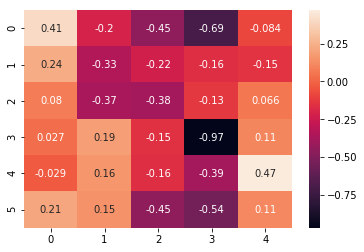

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.00915412 -0.10335021  0.20318084  0.09131011  0.05828238]
[-0.10588043 -0.11971665  0.10030916  0.10108804  0.08162202]
[-0.02128022 -0.1010778  -0.01976472 -0.03516943 -0.00779814]
[-0.1286842  -0.00286864 -0.05259823 -0.01809821 -0.0099435 ]
[ 0.1134993  -0.10090522  0.36033258  0.22168963  0.25299415]
[ 0.26300101 -0.0595773   0.24947471  0.60731402 -0.02066365]



['ANN' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'Lin_Reg' 'Lin_Reg']
['Ada_B' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'ANN']
['Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'Bayes_R' 'SVM' 'ANN' 'KNN']
['SVM' 'ANN' 'Ada_B' 'Ada_B' 'ANN']


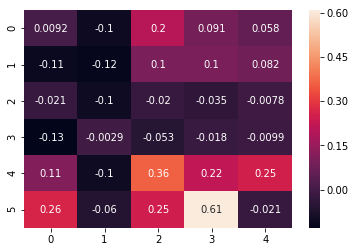

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.07215664  0.07226126 -0.21409062 -0.38571996  0.00192919]
[ -1.58336264e-01   1.18021315e-01   4.16328969e-01  -5.80041521e-01
  -3.25536677e-04]
[-0.13074675  0.38063225 -0.37395442 -0.22530864 -0.00627369]
[ 0.03768439 -0.07881328 -0.32502042  0.15609607  0.17248619]
[-0.06224771  0.16847793  0.08004129 -0.46521792  0.2643675 ]
[-0.07775858 -0.01820174 -0.24457312 -0.37768268  0.09246122]



['ANN' 'ANN' 'KNN' 'Lin_Reg' 'KNN']
['KNN' 'ANN' 'Ada_B' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'KNN' 'ANN']
['ANN' 'ANN' 'Lin_Reg' 'ANN' 'KNN']
['ANN' 'SVM' 'KNN' 'ANN' 'SVM']
['ANN' 'Lin_Reg' 'Ada_B' 'Lin_Reg' 'ANN']


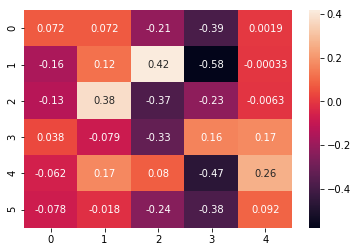

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.24738426 -0.20661574  0.11825685  0.11971386 -0.01687016]
[  3.71052258e-01   8.31614538e-02   2.19767862e-04  -1.77282204e-02
  -9.84901368e-03]
[-0.29547258 -0.05937081 -0.01448463  0.07901866  0.04155944]
[-0.1286842  -0.099345   -0.03599412 -0.01809821  0.01142958]
[-0.07318309 -0.11940356  0.19272079  0.01096117 -0.00108819]
[ 0.07302143 -0.03992165  0.2954189   0.3229817  -0.01007212]



['ANN' 'KNN' 'Lin_Reg' 'Lin_Reg' 'ANN']
['KNN' 'ANN' 'Lin_Reg' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'ANN' 'ANN' 'ANN']
['Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R' 'ANN']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['KNN' 'Lin_Reg' 'SVM' 'Ada_B' 'Bayes_R']


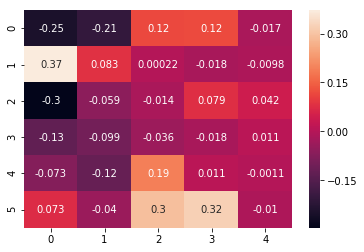

++++++++++
----------
Correlation threshold: 0.35
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.25352584 -0.54984998 -0.47234309 -0.82381058 -0.08354072]
[ 0.4256173   0.04889946 -0.29652628 -0.16004768 -0.05556322]
[ 0.08003743  0.05787979 -0.38300781 -0.04940173  0.06559886]
[-0.03703245  0.18674535 -0.14763337 -1.          0.10928391]
[-0.00086354  0.16059352 -0.15915596 -0.06948194  0.46966857]
[ 0.14442214  0.03770228 -0.44953735 -0.54166272  0.16422034]



['Ada_B' 'ANN' 'Bayes_R' 'ANN' 'Bayes_R']
['Ada_B' 'ANN' 'Ada_B' 'SVM' 'ANN']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'Nan' 'SVM']
['ANN' 'SVM' 'Bayes_R' 'Ada_B' 'SVM']
['KNN' 'Lin_Reg' 'Bayes_R' 'Bayes_R' 'Ada_B']


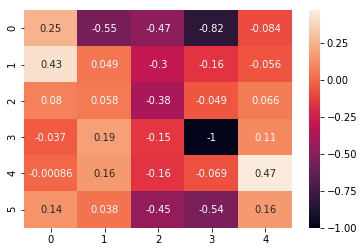

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.17830042 -0.10335021  0.18576035  0.23723411  0.00684931]
[-0.10588043 -0.11971665  0.10030916  0.11633516  0.08162202]
[-0.05217533 -0.1010778   0.10773951 -0.03516943  0.00897792]
[-0.02964137 -0.03591036 -0.05259823 -0.01809821 -0.0099435 ]
[ 0.00802136 -0.10090522  0.36033258  0.17544314  0.25299415]
[ 0.26300101 -0.09882236  0.31477884  0.4247577   0.00481391]



['ANN' 'Bayes_R' 'SVM' 'ANN' 'Ada_B']
['KNN' 'Bayes_R' 'SVM' 'ANN' 'Lin_Reg']
['Ada_B' 'Bayes_R' 'ANN' 'Bayes_R' 'ANN']
['ANN' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['KNN' 'Bayes_R' 'SVM' 'SVM' 'KNN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'ANN']


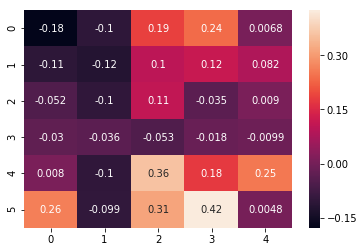

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.1610348  -0.05437129 -0.26871314 -0.31530565  0.02821175]
[ -1.58336264e-01   1.18456050e-01   2.18574135e-01  -6.07924298e-01
  -3.25536677e-04]
[-0.24130969  0.61339196 -0.34324683 -0.54425449  0.3500836 ]
[-0.04649241 -0.30085169 -0.32502042 -0.26232682  0.17248619]
[-0.01789651  0.16847793  0.08004129 -0.54155873  0.2643675 ]
[-0.01939977 -0.01820174 -0.3969115  -0.37768268  0.06789901]



['ANN' 'ANN' 'KNN' 'Lin_Reg' 'KNN']
['KNN' 'ANN' 'Ada_B' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'ANN' 'Bayes_R' 'Ada_B']
['ANN' 'ANN' 'Lin_Reg' 'ANN' 'KNN']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'SVM']
['ANN' 'Lin_Reg' 'Bayes_R' 'Lin_Reg' 'ANN']


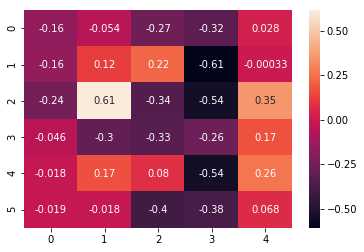

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.19862287 -0.17989492  0.11825685  0.11971386  0.17353907]
[ 0.37105226  0.03749315  0.03581852 -0.01772822 -0.00984901]
[-0.16502329 -0.08297112 -0.02920974  0.20421783  0.07382447]
[-0.05067055  0.07347425 -0.05259823 -0.01809821  0.05023916]
[-0.17143418 -0.11940356  0.19272079  0.05726734  0.03465139]
[ 0.07302143 -0.03992165  0.2954189   0.34682541 -0.01007212]



['ANN' 'ANN' 'Lin_Reg' 'Lin_Reg' 'Ada_B']
['KNN' 'ANN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['ANN' 'Ada_B' 'Bayes_R' 'ANN' 'Ada_B']
['Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R' 'ANN']
['Bayes_R' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['KNN' 'Lin_Reg' 'SVM' 'Ada_B' 'Bayes_R']


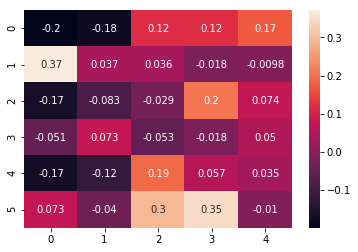

++++++++++
----------
Correlation threshold: 0.4
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.25690702 -0.03010672 -0.47234309 -0.58234463  0.05173201]
[ 0.32414223 -0.33425102 -0.34818553 -0.16004768 -0.14730981]
[ 0.08003743 -0.08172793 -0.38300781 -0.09326978  0.06559886]
[-0.00369192  0.18674535 -0.14763337 -0.32052076  0.10928391]
[-0.02853634  0.16059352 -0.15915596 -0.38520061  0.46966857]
[ 0.18261945  0.03770228 -0.32960818 -0.54166272  0.23073676]



['Ada_B' 'ANN' 'Bayes_R' 'ANN' 'Ada_B']
['Ada_B' 'Lin_Reg' 'ANN' 'SVM' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'ANN' 'SVM']
['Bayes_R' 'SVM' 'Bayes_R' 'Lin_Reg' 'SVM']
['Ada_B' 'Lin_Reg' 'ANN' 'Bayes_R' 'Ada_B']


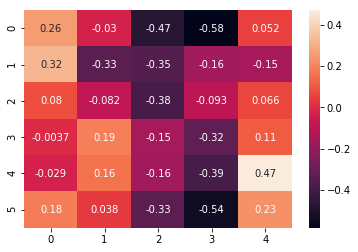

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.11166048 -0.14105936 -0.1219859   0.17787681 -0.02216076]
[-0.10588043 -0.11971665  0.10030916  0.10108804  0.08162202]
[-0.01069646 -0.1010778   0.18065184  0.22258948  0.00805065]
[-0.05067055 -0.099345    0.04875024 -0.01809821  0.0626231 ]
[ 0.00802136 -0.10090522  0.36033258  0.17544314  0.25299415]
[ 0.26300101 -0.09882236  0.4509987   0.36660997 -0.02207364]



['ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['KNN' 'Bayes_R' 'SVM' 'Lin_Reg' 'Lin_Reg']
['Ada_B' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'SVM' 'KNN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'Bayes_R']


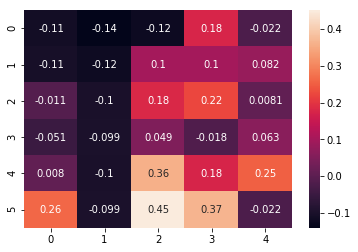

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.05708034  0.09708373 -0.26871314 -0.31530565  0.02821175]
[ -1.58336264e-01  -1.87633320e-01   2.06579865e-01  -5.03491703e-01
  -3.25536677e-04]
[-0.10917522  0.3935182  -0.06883861 -0.54327218  0.2194858 ]
[-0.0834053  -0.3184828  -0.32502042 -0.03396632  0.17248619]
[ 0.04271477  0.16847793  0.08004129 -0.54155873  0.2643675 ]
[-0.03484658 -0.01820174 -0.3969115  -0.37768268  0.02201508]



['ANN' 'ANN' 'KNN' 'Lin_Reg' 'KNN']
['KNN' 'ANN' 'Ada_B' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'SVM']
['Bayes_R' 'KNN' 'Lin_Reg' 'ANN' 'KNN']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'SVM']
['ANN' 'Lin_Reg' 'Bayes_R' 'Lin_Reg' 'Lin_Reg']


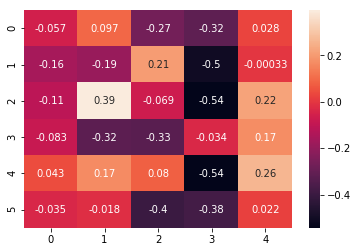

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.13015097 -0.08871969  0.10772226  0.19588194  0.04928411]
[ 0.08539213 -0.09985262  0.10529201  0.14248229  0.05309339]
[-0.19322512 -0.05620498  0.03186332  0.04683064  0.01514149]
[ 0.03659362 -0.099345   -0.05259823 -0.01809821 -0.0099435 ]
[-0.17143418 -0.11940356  0.19272079  0.08812608  0.0142118 ]
[ 0.07302143 -0.02084906  0.2954189   0.29952695 -0.01007212]



['ANN' 'Bayes_R' 'SVM' 'Lin_Reg' 'SVM']
['KNN' 'Bayes_R' 'ANN' 'KNN' 'SVM']
['ANN' 'KNN' 'KNN' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['KNN' 'ANN' 'SVM' 'Ada_B' 'Bayes_R']


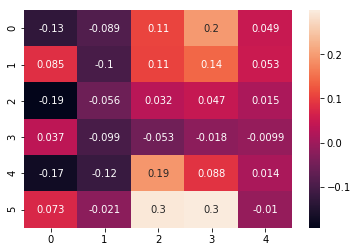

++++++++++
----------
**********
**********
Minimum correlation variables: 5
Correlation threshold: 0.3
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.45193828  0.10480505 -0.43454666 -0.2183642  -0.10071374]
[ 0.07251381  0.05104475 -0.25119153 -0.58473179 -0.10645263]
[ 0.21295975 -0.04256782 -0.37567616 -0.09596671  0.21070802]
[ 0.02948939  0.1641402  -0.15017017 -1.          0.09709936]
[-0.02446426 -0.37140705 -0.21352864 -0.25234568 -0.00166146]
[ 0.25291626 -0.09919226 -0.54451071 -0.54179982  0.15301105]



['SVM' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'KNN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'Nan' 'ANN']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R']
['KNN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']


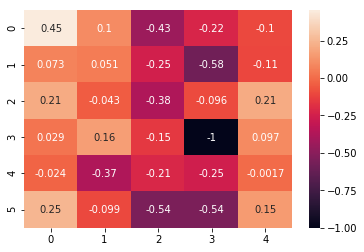

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.06967479 -0.07952507  0.35293245 -0.01879104 -0.01278017]
[-0.1837737  -0.09365001  0.07514772  0.38053627  0.09161444]
[ 0.1914884   0.31015456 -0.01975836  0.30389305 -0.1391993 ]
[-0.02730761 -0.03916775 -0.02920718 -0.0196627  -0.01000412]
[-0.05257573 -0.10165015  0.2206186   0.26498728  0.07485396]
[ 0.2924314  -0.11630658  0.39509579  0.46259531  0.03126603]



['ANN' 'Bayes_R' 'Lin_Reg' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'ANN' 'ANN' 'SVM' 'KNN']
['Ada_B' 'Ada_B' 'Bayes_R' 'ANN' 'Bayes_R']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'ANN' 'Lin_Reg' 'ANN']
['SVM' 'Bayes_R' 'KNN' 'Ada_B' 'ANN']


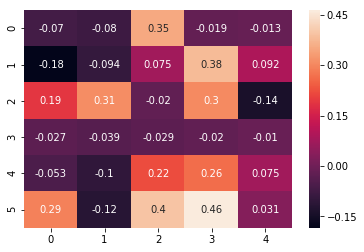

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08920573 -0.04382358  0.05996836 -0.35096972  0.15989462]
[-0.2409253  -0.36976053  0.14284136 -0.64356848 -0.00111583]
[-0.06020689  0.52131865 -0.37395442 -0.22530864  0.01514618]
[ 0.1441883   0.25423294 -0.37893402 -1.          0.22593363]
[-0.19522327 -0.0241882  -0.37269998 -0.54153176  0.24539945]
[-0.06139068 -0.05378442 -0.2424989  -0.42825896  0.25665441]



['ANN' 'ANN' 'KNN' 'SVM' 'ANN']
['ANN' 'Bayes_R' 'Ada_B' 'Bayes_R' 'Bayes_R']
['Ada_B' 'SVM' 'KNN' 'KNN' 'ANN']
['ANN' 'SVM' 'Bayes_R' 'Nan' 'ANN']
['ANN' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'Lin_Reg' 'Ada_B' 'SVM' 'SVM']


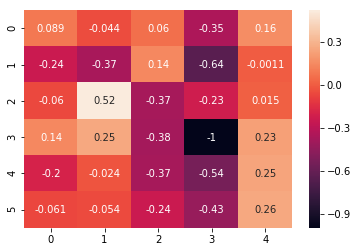

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.07264104 -0.17091046  0.07313494 -0.01806447 -0.0416672 ]
[ 0.11499553 -0.07675886  0.21754477  0.02194306  0.21336716]
[-0.05395513 -0.10056124 -0.1117773  -0.02076729 -0.08360055]
[-0.02730761  0.1973053  -0.0251662  -0.0196627  -0.01000412]
[-0.17130077 -0.10955369  0.27047886 -0.0188043   0.00053632]
[ 0.11088742 -0.09845077  0.24236477  0.43448237 -0.00585733]



['ANN' 'ANN' 'Lin_Reg' 'Bayes_R' 'Bayes_R']
['KNN' 'ANN' 'KNN' 'KNN' 'SVM']
['Gauss_P' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'ANN']
['KNN' 'ANN' 'ANN' 'Bayes_R' 'Bayes_R']
['ANN' 'Bayes_R' 'SVM' 'Bayes_R' 'KNN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'ANN']


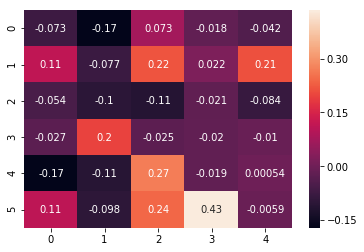

++++++++++
----------
Correlation threshold: 0.33
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.45193828  0.08951726 -0.43454666 -0.2183642  -0.10071374]
[ 0.1862684   0.14344672 -0.37833992 -0.58473179 -0.10645263]
[ 0.21295975 -0.17265741 -0.37567616 -0.06069149  0.21070802]
[ 0.04124418  0.1641402  -0.15017017 -0.00916278  0.08675638]
[-0.02446426 -0.37140705 -0.21352864 -0.25234568  0.26657052]
[ 0.25291626 -0.09919226 -0.54451071 -0.54179982  0.15301105]



['SVM' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'Ada_B' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'ANN' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN' 'Ada_B']
['KNN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']


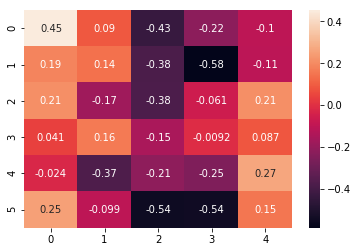

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.2055682  -0.12508224  0.10246806  0.09879927 -0.00649029]
[-0.17946721 -0.1820655  -0.01920414  0.38053627  0.1890197 ]
[ 0.24245439  0.13470356 -0.01975836 -0.15959732 -0.09184174]
[-0.02730761 -0.09908007 -0.02920718 -0.0196627   0.02541754]
[-0.05257573 -0.10165015  0.17408515  0.26498728  0.04086672]
[ 0.2924314  -0.08377541  0.39509579  0.38533983 -0.00903769]



['ANN' 'Bayes_R' 'ANN' 'ANN' 'Bayes_R']
['ANN' 'Bayes_R' 'Bayes_R' 'SVM' 'ANN']
['Ada_B' 'Ada_B' 'Bayes_R' 'Bayes_R' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Bayes_R' 'Bayes_R' 'KNN' 'Lin_Reg' 'ANN']
['SVM' 'ANN' 'KNN' 'Ada_B' 'Bayes_R']


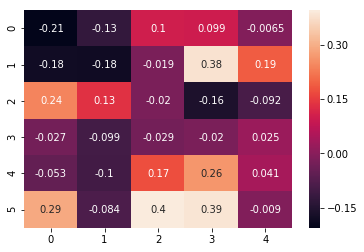

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.14802985 -0.34309697 -0.28630027 -0.29868122 -0.04319784]
[-0.27359026  0.08945178  0.19552888 -0.64356848 -0.00111583]
[-0.0962363   0.52131865 -0.37395442 -0.22530864 -0.00353806]
[-0.00280461  0.25423294 -0.37893402 -0.03833652  0.2290657 ]
[ 0.0144448  -0.0241882  -0.37269998 -0.54153176  0.24539945]
[-0.06330244  0.03222892 -0.39283237 -0.42825896  0.25665441]



['ANN' 'ANN' 'KNN' 'SVM' 'ANN']
['Bayes_R' 'ANN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'KNN' 'Bayes_R']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'SVM' 'SVM']


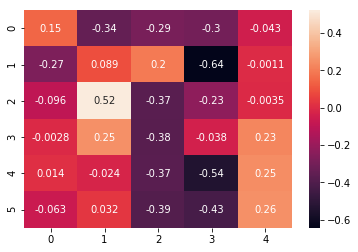

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.28351296 -0.21199809  0.08222524 -0.00371463  0.04658961]
[ 0.11499553  0.03257701  0.21754477  0.04891333  0.21336716]
[-0.22877045 -0.09999362 -0.058483    0.23165573 -0.1031052 ]
[-0.02730761  0.00066919 -0.02920718 -0.0196627  -0.01000412]
[-0.14254743 -0.10955369  0.27047886  0.04702223  0.00053632]
[ 0.11088742  0.08252972  0.30021793  0.54082473 -0.0108201 ]



['Bayes_R' 'ANN' 'Lin_Reg' 'Lin_Reg' 'KNN']
['KNN' 'ANN' 'KNN' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'KNN']
['SVM' 'ANN' 'Ada_B' 'Ada_B' 'Bayes_R']


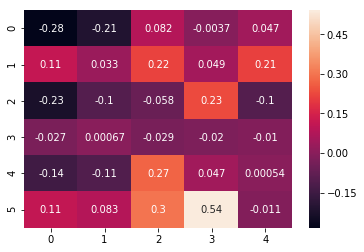

++++++++++
----------
Correlation threshold: 0.35
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.45193828  0.02856985 -0.43454666 -0.2183642  -0.10071374]
[ 0.22241038  0.05104475 -0.26650134 -0.58473179 -0.10645263]
[ 0.21295975  0.15831812 -0.37567616 -0.55226511  0.21070802]
[ 0.09827554  0.1641402  -0.15017017 -0.18884016  0.14515251]
[-0.02446426 -0.37140705 -0.21352864 -0.25234568 -0.00166146]
[ 0.25291626 -0.09919226 -0.54451071 -0.54179982  0.15301105]



['SVM' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'KNN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'ANN' 'ANN']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R']
['KNN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']


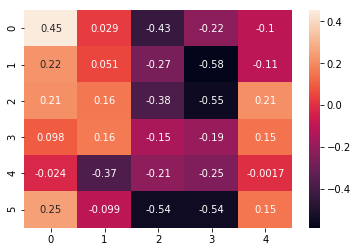

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.0521236  -0.12508224 -0.00959929  0.01904359 -0.00649029]
[-0.11833475 -0.1820655   0.016503    0.38053627  0.14755752]
[ 0.18585411 -0.03358764  0.17428908 -0.15196739  0.07965522]
[-0.02730761 -0.09908007 -0.02920718 -0.0196627   0.04858936]
[-0.05257573 -0.10165015  0.17408515  0.26498728  0.01207893]
[ 0.2924314  -0.11630658  0.39509579  0.46187087 -0.00903769]



['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R']
['ANN' 'Bayes_R' 'ANN' 'SVM' 'ANN']
['Ada_B' 'Ada_B' 'ANN' 'ANN' 'ANN']
['KNN' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Bayes_R' 'Bayes_R' 'KNN' 'Lin_Reg' 'SVM']
['SVM' 'Bayes_R' 'KNN' 'Ada_B' 'Bayes_R']


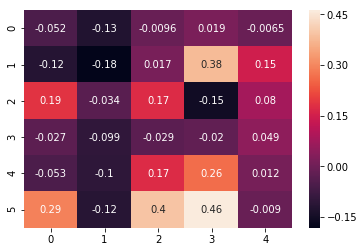

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.00661786 -0.37198768 -0.28630027 -0.29868122  0.1398204 ]
[-0.23048526 -0.06336513  0.16040505 -0.64356848 -0.00111583]
[-0.32612536  0.46987898  0.05727399 -0.5085702   0.23439197]
[-0.03455048  0.25423294 -0.37893402 -0.00451959  0.25612941]
[-0.0802873  -0.0241882  -0.37269998 -0.54153176  0.24539945]
[-0.14496658 -0.05378442 -0.28467878 -0.42825896  0.34330987]



['ANN' 'Bayes_R' 'KNN' 'SVM' 'ANN']
['ANN' 'ANN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['Ada_B' 'SVM' 'KNN' 'ANN' 'SVM']
['Lin_Reg' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'SVM' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['Ada_B' 'Lin_Reg' 'ANN' 'SVM' 'Ada_B']


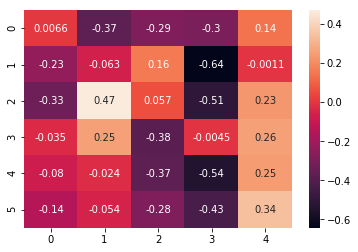

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.1291513  -0.1286054   0.08222524 -0.00371463  0.04658961]
[ 0.11499553  0.03241222  0.21754477  0.02194306  0.21336716]
[-0.23777824 -0.10025959 -0.03820825  0.00357276 -0.02319652]
[-0.02730761  0.38460789 -0.02920718 -0.0196627  -0.01000412]
[-0.2361103  -0.10955369  0.27047886 -0.0188043   0.07372569]
[ 0.11088742 -0.09845077  0.28161233  0.37365931 -0.00729925]



['ANN' 'ANN' 'Lin_Reg' 'Lin_Reg' 'KNN']
['KNN' 'ANN' 'KNN' 'KNN' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'ANN']


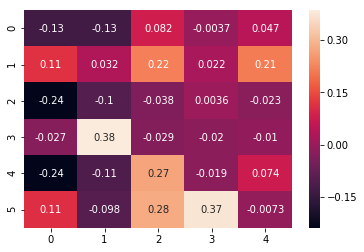

++++++++++
----------
Correlation threshold: 0.4
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.45193828 -0.27689361 -0.43454666 -0.2183642  -0.10071374]
[ 0.17787838  0.13108348 -0.37833992 -0.58473179 -0.10645263]
[ 0.31136009 -0.14642429 -0.37567616 -0.55226511  0.21070802]
[ 0.15385978  0.1641402  -0.15017017 -0.65454022  0.14751272]
[ 0.07468475 -0.37140705 -0.21352864 -0.25234568 -0.00166146]
[ 0.25291626 -0.09919226 -0.21445329 -0.54179982  0.15301105]



['SVM' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'Ada_B' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'SVM' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R']
['KNN' 'Bayes_R' 'ANN' 'Bayes_R' 'KNN']


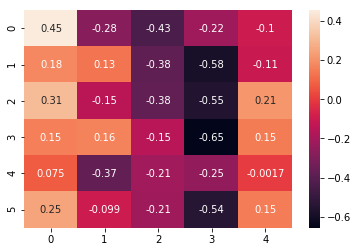

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.02500369 -0.12508224  0.10359685  0.17690359 -0.00649029]
[-0.05379503 -0.1820655  -0.01920414  0.38053627  0.09161444]
[ 0.14063465  0.06593966  0.18553778  0.20521545 -0.1391993 ]
[-0.02730761 -0.00761668 -0.02920718 -0.0196627  -0.01000412]
[-0.05257573 -0.10165015  0.17408515  0.26498728  0.16163488]
[ 0.2924314  -0.10433535  0.39509579  0.51653381 -0.00903769]



['ANN' 'Bayes_R' 'ANN' 'ANN' 'Bayes_R']
['ANN' 'Bayes_R' 'Bayes_R' 'SVM' 'KNN']
['Ada_B' 'Ada_B' 'ANN' 'ANN' 'Bayes_R']
['KNN' 'ANN' 'SVM' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'KNN' 'Lin_Reg' 'ANN']
['SVM' 'ANN' 'KNN' 'Ada_B' 'Bayes_R']


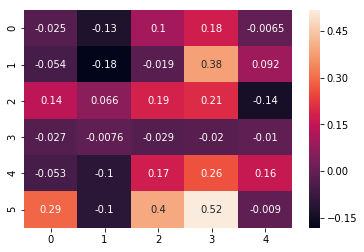

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.08492655 -0.37198768 -0.28630027 -0.29868122 -0.27152703]
[-0.16625994  0.04614093  0.27053353 -0.64356848 -0.00111583]
[-0.25416034  0.46987898  0.05727399 -0.54401193  0.23439197]
[ 0.16713883  0.25423294 -0.37893402 -0.54898729  0.0974553 ]
[-0.42286115 -0.0241882  -0.37269998 -0.54153176  0.41308133]
[-0.09948342 -0.05378442 -0.39283237 -0.42825896  0.5106846 ]



['Bayes_R' 'Bayes_R' 'KNN' 'SVM' 'Bayes_R']
['ANN' 'ANN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'SVM']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'Ada_B']
['ANN' 'Lin_Reg' 'Bayes_R' 'SVM' 'Ada_B']


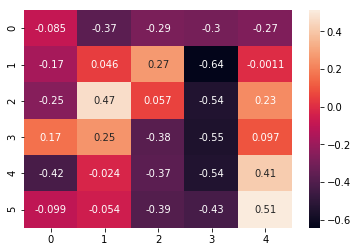

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.08263794 -0.09362794  0.09076693  0.09788331  0.02600357]
[ 0.11499553 -0.09971393  0.21754477  0.03271367  0.21336716]
[-0.16686172 -0.10025959 -0.03820825  0.16664722 -0.02319652]
[-0.02730761 -0.09908007 -0.02920718 -0.0196627  -0.01000412]
[-0.05269753 -0.10955369  0.27047886  0.2734813   0.16409699]
[ 0.11088742 -0.09845077  0.2122751   0.52781592 -0.0108201 ]



['ANN' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['KNN' 'Bayes_R' 'KNN' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['SVM' 'Bayes_R' 'Lin_Reg' 'Ada_B' 'Bayes_R']


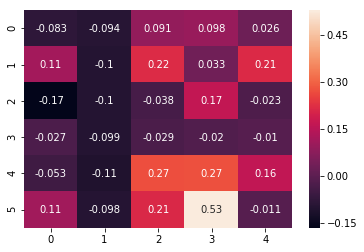

++++++++++
----------
**********
**********
Minimum correlation variables: 7
Correlation threshold: 0.3
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.06575722 -0.34027242 -0.4022252   0.0007716  -0.19079785]
[ 0.44963648 -0.08014348 -0.22608794 -0.44192795 -0.10534375]
[ 0.30331273 -0.06177771 -0.37316997 -0.92565031  0.39421358]
[ 0.02713388 -0.36867875 -0.37782689 -0.71637634  0.24020003]
[-0.00562989 -0.41214886 -0.21599054 -0.38400299  0.44158417]
[ 0.15056696  0.00354965 -0.8808311  -0.34664866  0.0801105 ]



['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'ANN' 'KNN' 'Ada_B' 'ANN']
['KNN' 'ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'ANN']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'KNN']
['Ada_B' 'KNN' 'KNN' 'Bayes_R' 'KNN']


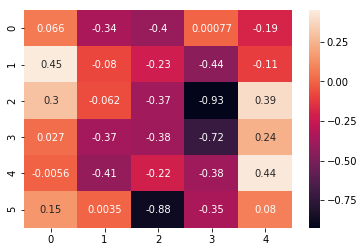

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.19723297  0.07354758  0.21693473 -0.01867089  0.13087218]
[-0.12585043 -0.10118058 -0.01922156  0.35240518 -0.00935055]
[ 0.06021101  0.41918115  0.07429898  0.00592887  0.18576064]
[-0.11041383 -0.09904273 -0.04060134  0.31424581  0.01636711]
[ 0.06860281 -0.10116778  0.15901369  0.55244479  0.16777127]
[ 0.23394072 -0.13261345  0.16004282  0.43305563  0.00437441]



['Bayes_R' 'Ada_B' 'ANN' 'Bayes_R' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'SVM' 'Bayes_R']
['Ada_B' 'Ada_B' 'ANN' 'ANN' 'SVM']
['KNN' 'Bayes_R' 'Bayes_R' 'ANN' 'KNN']
['Ada_B' 'Bayes_R' 'ANN' 'Lin_Reg' 'ANN']
['Ada_B' 'Bayes_R' 'Lin_Reg' 'KNN' 'Bayes_R']


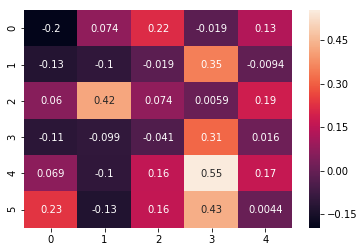

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.0514785  -0.208213   -0.12829405  0.00847602 -0.50816249]
[ -2.81860777e-01  -3.69697791e-01   1.75341287e-01  -6.06454490e-01
  -4.06641447e-04]
[-0.34168122  0.50847993 -0.37395442 -0.3099622   0.19092059]
[  9.94278966e-02   4.70997676e-02  -3.78318309e-01   1.09397909e-01
   8.02608456e-05]
[ 0.06068135  0.10363331 -0.34617347 -0.18290123  0.20186863]
[  4.86778916e-02  -9.75102773e-02  -6.34393493e-01  -5.34624770e-01
   3.78565339e-04]



['Ada_B' 'ANN' 'SVM' 'SVM' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'Ada_B' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'Ada_B' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'Bayes_R']
['ANN' 'ANN' 'Bayes_R' 'KNN' 'Lin_Reg']
['Ada_B' 'SVM' 'ANN' 'Bayes_R' 'Bayes_R']


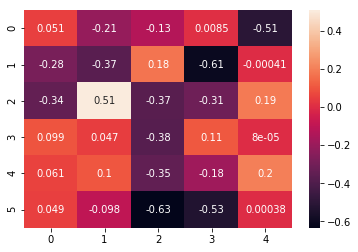

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.22434928 -0.04003518  0.02494514 -0.01779795  0.05613458]
[-0.03116076 -0.09972104  0.01312638  0.02276305  0.17993877]
[-0.05395513 -0.10031612  0.03100633 -0.0189159  -0.07240219]
[-0.08459442  0.21739624 -0.02389876  0.26187352  0.04312224]
[-0.10902907 -0.10193905  0.31430059 -0.01837205  0.00097313]
[ 0.39718855 -0.09653771  0.37785441  0.17967939 -0.00992832]



['Bayes_R' 'ANN' 'Lin_Reg' 'Bayes_R' 'KNN']
['KNN' 'Bayes_R' 'ANN' 'KNN' 'SVM']
['Gauss_P' 'Bayes_R' 'ANN' 'Bayes_R' 'KNN']
['KNN' 'ANN' 'Bayes_R' 'KNN' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'Bayes_R' 'KNN']
['KNN' 'Lin_Reg' 'KNN' 'Ada_B' 'Bayes_R']


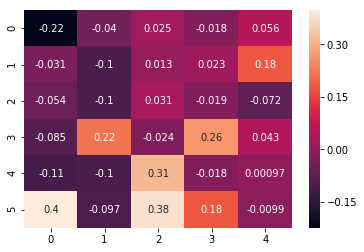

++++++++++
----------
Correlation threshold: 0.33
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.06575722 -0.15729308 -0.16621076  0.0007716  -0.19079785]
[ 0.44235975 -0.32563184 -0.22608794 -0.56348232 -0.10647554]
[ 0.30331273 -0.47224236 -0.37316997 -0.71872937  0.39421358]
[ 0.00173095  0.02146317 -0.37782689 -0.04371401  0.20171806]
[-0.00562989 -0.41214886 -0.21599054 -0.26806896  0.44158417]
[ 0.1643913   0.01910886 -0.73324167 -0.34664866  0.0801105 ]



['Bayes_R' 'ANN' 'Ada_B' 'KNN' 'Bayes_R']
['Ada_B' 'Ada_B' 'KNN' 'Bayes_R' 'ANN']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['ANN' 'ANN' 'Bayes_R' 'ANN' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'Ada_B' 'KNN']
['Ada_B' 'Ada_B' 'ANN' 'Bayes_R' 'KNN']


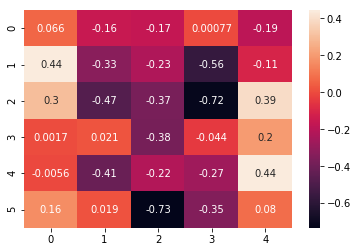

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.17154246 -0.00421422 -0.01146502 -0.01867089  0.17723426]
[-0.12585043 -0.10118058  0.01476136  0.35240518 -0.00116279]
[ 0.11422912  0.11497622  0.02455113 -0.0392238   0.18576064]
[-0.11041383 -0.09904273 -0.04060134 -0.01961009  0.01636711]
[ 0.13127247 -0.10116778  0.0305105   0.55244479  0.20536545]
[ 0.21545062 -0.03318476  0.18906713  0.43305563  0.03239505]



['ANN' 'Ada_B' 'Bayes_R' 'Bayes_R' 'Ada_B']
['Bayes_R' 'Bayes_R' 'ANN' 'SVM' 'ANN']
['Ada_B' 'Ada_B' 'ANN' 'Bayes_R' 'SVM']
['KNN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']
['Ada_B' 'Bayes_R' 'ANN' 'Lin_Reg' 'ANN']
['Ada_B' 'ANN' 'Ada_B' 'KNN' 'Ada_B']


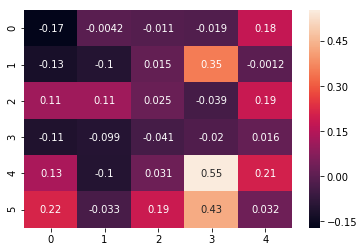

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.35178372  0.15297356 -0.12829405  0.00847602 -0.39222837]
[-0.28186078 -0.36969779  0.04963496 -0.60645449  0.016244  ]
[-0.06461432  0.50847993 -0.37395442 -0.54161059  0.19092059]
[-0.00540741  0.04709977 -0.37831831 -0.20358201  0.23235676]
[ 0.07083075 -0.39511762 -0.34617347 -0.18290123  0.30494587]
[-0.06498825 -0.09751028 -0.51007615 -0.53462477  0.1647367 ]



['Ada_B' 'ANN' 'SVM' 'SVM' 'ANN']
['Bayes_R' 'Bayes_R' 'Ada_B' 'Bayes_R' 'ANN']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'Lin_Reg']
['Lin_Reg' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Bayes_R' 'KNN' 'Ada_B']
['ANN' 'SVM' 'ANN' 'Bayes_R' 'ANN']


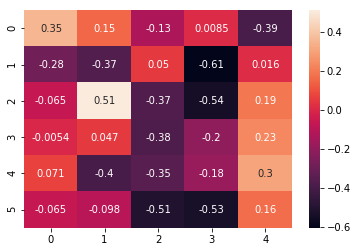

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.12377396 -0.15951548  0.18795084 -0.01735213 -0.03623573]
[-0.03116076 -0.09972104  0.10354414  0.19341647  0.17993877]
[-0.25075061 -0.09996334 -0.05808094 -0.01856515 -0.02319652]
[-0.08459442  0.16346257 -0.02389876  0.26187352  0.04312224]
[-0.01221711 -0.10193905  0.31430059  0.07313036  0.11683579]
[ 0.46398574 -0.09653771  0.37785441  0.14829384 -0.00992832]



['ANN' 'ANN' 'SVM' 'Lin_Reg' 'Bayes_R']
['KNN' 'Bayes_R' 'ANN' 'ANN' 'SVM']
['Gauss_P' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']
['KNN' 'ANN' 'Bayes_R' 'KNN' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['Ada_B' 'Lin_Reg' 'KNN' 'Ada_B' 'Bayes_R']


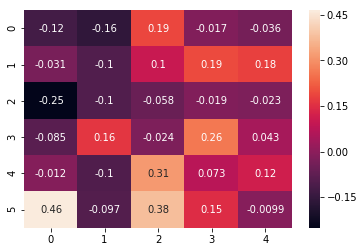

++++++++++
----------
Correlation threshold: 0.35
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.06575722 -0.51154255 -0.4022252   0.0007716  -0.19079785]
[ 0.15200137 -0.36696825 -0.22608794 -0.56099466 -0.13461544]
[ 0.30331273 -0.51027405 -0.37316997 -0.92565031  0.39421358]
[ 0.0769265  -0.36867875 -0.37782689 -0.28103352  0.03435687]
[-0.00562989 -0.41214886 -0.21599054 -0.38400299  0.44158417]
[ 0.01582071  0.00354965 -0.42357043 -0.34664866  0.0801105 ]



['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'Bayes_R' 'KNN' 'Ada_B' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'KNN']
['ANN' 'KNN' 'ANN' 'Bayes_R' 'KNN']


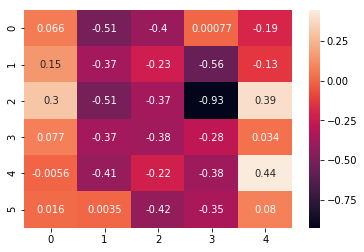

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.03736722 -0.11155849  0.00099826  0.02530634  0.1457239 ]
[-0.05898073 -0.10118058  0.13541219  0.35240518  0.00223588]
[ 0.07694192  0.11332446 -0.00330591  0.03424922  0.18576064]
[-0.11041383 -0.09904273 -0.04060134 -0.01961009  0.01636711]
[ 0.13072429 -0.10116778 -0.01787605  0.55244479  0.10043196]
[ 0.21430108 -0.13261345  0.16004282  0.43305563  0.00437441]



['ANN' 'Bayes_R' 'ANN' 'ANN' 'Ada_B']
['ANN' 'Bayes_R' 'ANN' 'SVM' 'ANN']
['Ada_B' 'Ada_B' 'ANN' 'ANN' 'SVM']
['KNN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN']
['Ada_B' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'ANN']
['KNN' 'Bayes_R' 'Lin_Reg' 'KNN' 'Bayes_R']


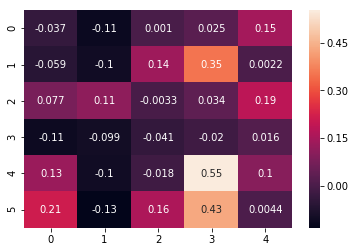

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.36138841 -0.37189855 -0.12829405  0.00847602 -0.40819348]
[ -1.96192169e-01  -2.51013527e-01   7.96223271e-02  -6.06454490e-01
  -4.06641447e-04]
[-0.37294059  0.48644306 -0.08723003 -0.33282407  0.31320226]
[  4.29307599e-02   4.70997676e-02  -3.78318309e-01  -7.48263093e-01
   8.02608456e-05]
[-0.0695238  -0.39511762 -0.25521684 -0.18290123  0.28217142]
[ -1.51569159e-02  -9.75102773e-02  -3.56853012e-01  -5.34624770e-01
   3.78565339e-04]



['Ada_B' 'Bayes_R' 'SVM' 'SVM' 'ANN']
['ANN' 'ANN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'Ada_B' 'Ada_B']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'Bayes_R']
['ANN' 'Bayes_R' 'ANN' 'KNN' 'Ada_B']
['Ada_B' 'SVM' 'ANN' 'Bayes_R' 'Bayes_R']


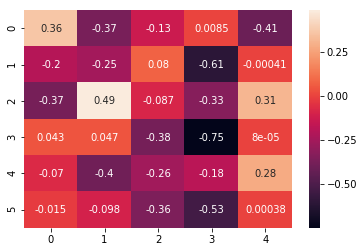

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.17038023 -0.18129546  0.18795084 -0.01735213 -0.03623573]
[-0.03116076 -0.09972104  0.00580777  0.02276305  0.17993877]
[-0.25075061 -0.09996334 -0.05808094 -0.01856515  0.00520563]
[-0.08459442  0.00933855  0.1618822   0.26187352  0.04312224]
[-0.19220349 -0.10193905  0.31430059  0.03637049  0.00097313]
[ 0.40672888 -0.09653771  0.37785441  0.14388923  0.02140763]



['ANN' 'SVM' 'SVM' 'Lin_Reg' 'Bayes_R']
['KNN' 'Bayes_R' 'SVM' 'KNN' 'SVM']
['Gauss_P' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'Ada_B']
['KNN' 'Lin_Reg' 'ANN' 'KNN' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'KNN']
['Ada_B' 'Lin_Reg' 'KNN' 'Bayes_R' 'ANN']


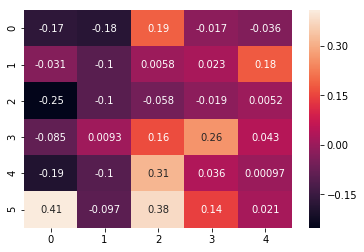

++++++++++
----------
Correlation threshold: 0.4
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.06575722 -0.04211053 -0.4022252   0.0007716  -0.19079785]
[ 0.26458211 -0.20589676 -0.22608794 -0.56348232 -0.13461544]
[ 0.30331273 -0.14375665 -0.37316997 -0.13482419  0.39421358]
[-0.02005873  0.10302934 -0.37782689 -0.64326317  0.39311394]
[-0.00562989 -0.41214886 -0.21599054  0.12293935  0.44158417]
[ 0.15049398  0.00354965 -0.63176216 -0.34664866  0.0801105 ]



['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'Lin_Reg']
['Ada_B' 'ANN' 'Bayes_R' 'ANN' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'Ada_B' 'KNN']
['Ada_B' 'KNN' 'ANN' 'Bayes_R' 'KNN']


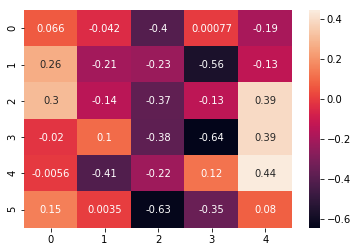

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.16480903 -0.11155849  0.14065377 -0.01867089  0.10241351]
[-0.12585043 -0.10118058 -0.00831364  0.35240518  0.08888163]
[  2.29381787e-04   3.05998232e-01   1.79625546e-01  -3.92238018e-02
   1.85760642e-01]
[-0.11041383 -0.09904273 -0.04060134  0.00149273  0.01636711]
[ 0.01973357 -0.10116778 -0.01787605  0.55244479  0.18878358]
[ 0.21430108  0.07081348  0.16004282  0.43305563  0.10110533]



['ANN' 'Bayes_R' 'ANN' 'Bayes_R' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Ada_B' 'SVM' 'ANN']
['Ada_B' 'Ada_B' 'ANN' 'Bayes_R' 'SVM']
['KNN' 'Bayes_R' 'Bayes_R' 'ANN' 'KNN']
['Ada_B' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'ANN']
['KNN' 'ANN' 'Lin_Reg' 'KNN' 'ANN']


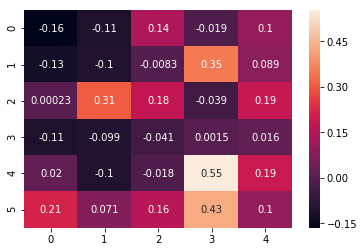

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.15381151 -0.37189855 -0.12829405  0.00847602 -0.02775727]
[ -2.69601818e-01  -3.69697791e-01   3.99275962e-01  -6.06454490e-01
  -4.06641447e-04]
[-0.29485409  0.48644306 -0.03072791 -0.31108958  0.25166745]
[  1.22673696e-01   4.70997676e-02  -1.64358696e-01  -5.56539394e-01
   8.02608456e-05]
[-0.25355857 -0.31094555 -0.34617347 -0.18290123  0.20186863]
[ -1.10785283e-01  -9.75102773e-02  -7.39792623e-01  -5.34624770e-01
   3.78565339e-04]



['Ada_B' 'Bayes_R' 'SVM' 'SVM' 'ANN']
['ANN' 'Bayes_R' 'Ada_B' 'Bayes_R' 'Bayes_R']
['Ada_B' 'SVM' 'Ada_B' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'ANN' 'ANN' 'Bayes_R']
['Bayes_R' 'Ada_B' 'Bayes_R' 'KNN' 'Lin_Reg']
['Bayes_R' 'SVM' 'ANN' 'Bayes_R' 'Bayes_R']


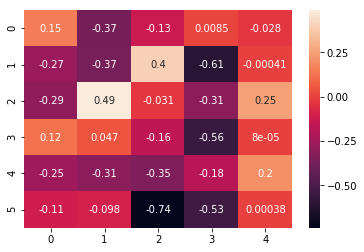

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.12314293  0.00210026  0.2181209   0.20806387  0.19427797]
[-0.03116076  0.03656498  0.01802851  0.02276305  0.17993877]
[-0.25075061 -0.09996334 -0.05808094 -0.01856515  0.00762551]
[-0.08459442  0.00933855 -0.02389876  0.26187352  0.04312224]
[-0.13863017 -0.10193905  0.31430059 -0.01837205  0.01109712]
[ 0.40027901  0.05047869  0.37785441  0.14388923  0.00275328]



['ANN' 'ANN' 'SVM' 'Lin_Reg' 'KNN']
['KNN' 'ANN' 'ANN' 'KNN' 'SVM']
['Gauss_P' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'ANN']
['KNN' 'Lin_Reg' 'Bayes_R' 'KNN' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Ada_B' 'Ada_B' 'KNN' 'Bayes_R' 'ANN']


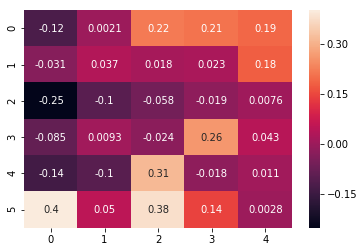

++++++++++
----------
**********
**********
Minimum correlation variables: 9
Correlation threshold: 0.3
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08646738 -0.4347524  -0.40957199 -0.34169753  0.01587553]
[ 0.21189659  0.00306343 -0.37810843 -0.36810877 -0.11709592]
[ 0.00156911  0.15303975 -0.37310122 -0.36993979  0.37359291]
[-0.08124982 -0.36893689 -0.37900832 -0.55883699  0.15361335]
[-0.00421076  0.02329596 -0.22448754  0.09209877  0.14222793]
[ 0.25159095  0.05926012 -0.7286597  -0.36586916  0.00084559]



['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Ada_B']
['Ada_B' 'Ada_B' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['SVM' 'ANN' 'Bayes_R' 'ANN' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'Ada_B']
['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Lin_Reg']
['KNN' 'KNN' 'ANN' 'Bayes_R' 'Bayes_R']


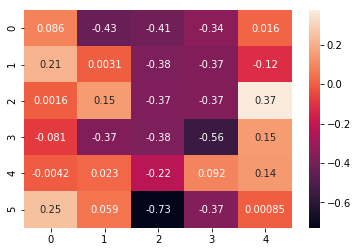

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.00845897 -0.16712209 -0.01581044 -0.01850363 -0.00104368]
[ 0.00309671 -0.10033641  0.13298707  0.1870763  -0.0100876 ]
[ 0.0169081   0.28241846  0.2531035  -0.02499972  0.31864749]
[ 0.13327476 -0.09939315  0.29525667 -0.01973988  0.01932623]
[-0.00453575 -0.10079315 -0.06523118  0.17529177 -0.00585444]
[ 0.25575352  0.23828253  0.18765274  0.63034637  0.11765407]



['ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'Bayes_R']
['ANN' 'KNN' 'ANN' 'Bayes_R' 'KNN']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'ANN']
['Ada_B' 'Bayes_R' 'Ada_B' 'ANN' 'ANN']
['SVM' 'SVM' 'Lin_Reg' 'KNN' 'SVM']


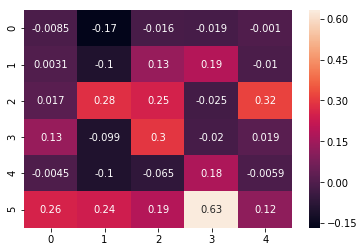

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.29496203 -0.0398319  -0.30875335 -0.63283213 -0.04471045]
[ -1.15849578e-01  -3.05029155e-01  -1.08532976e-01  -5.81381276e-01
   5.75799189e-05]
[-0.41230483  0.42093868 -0.0335571  -0.54202276  0.28264242]
[-0.00974732 -0.0013176  -0.37856638 -0.17041805  0.13952108]
[ 0.0203389  -0.40825896 -0.34218357 -0.16836203  0.41769307]
[ 0.00824715 -0.10829485 -0.65419265 -0.07567901  0.02304994]



['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'ANN']
['ANN' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'Bayes_R' 'Ada_B']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'ANN' 'Ada_B' 'Ada_B']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'ANN']


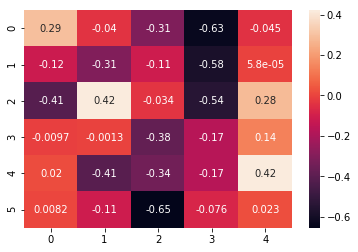

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.08143642 -0.19785953  0.10036824 -0.01770943 -0.03205266]
[-0.15381588 -0.10006617  0.11618177 -0.01698864  0.09961223]
[-0.05395513  0.08755259 -0.10050391 -0.01855068 -0.07026772]
[-0.04122726  0.28026309 -0.01288338 -0.01692669 -0.01008433]
[-0.18068062 -0.10199887  0.2819172   0.01897002  0.09536526]
[ 0.1647897  -0.09912434  0.02477107  0.15803399  0.17553981]



['ANN' 'Bayes_R' 'Lin_Reg' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Gauss_P' 'Gauss_P' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['KNN' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'Bayes_R' 'Ada_B' 'ANN' 'KNN']
['SVM' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'ANN']


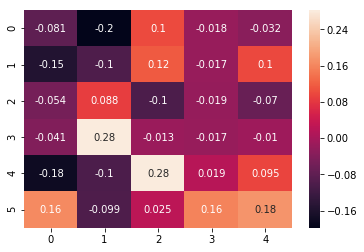

++++++++++
----------
Correlation threshold: 0.33
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08646738 -0.48171822 -0.40957199 -0.34169753 -0.18448951]
[ 0.30717376 -0.36792328 -0.09674213 -0.36810877 -0.11709592]
[ 0.00156911 -0.55619522 -0.25863812 -0.90449218  0.37359291]
[-0.20417623 -0.36893689 -0.25221622 -0.43560314  0.20398464]
[-0.00421076 -0.26106652 -0.22448754  0.09209877  0.14222793]
[ 0.25159095  0.05926012 -0.63550005 -0.36586916  0.00084559]



['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'Bayes_R' 'Ada_B' 'Lin_Reg' 'Bayes_R']
['SVM' 'Bayes_R' 'Ada_B' 'Bayes_R' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'Ada_B']
['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Lin_Reg']
['KNN' 'KNN' 'ANN' 'Bayes_R' 'Bayes_R']


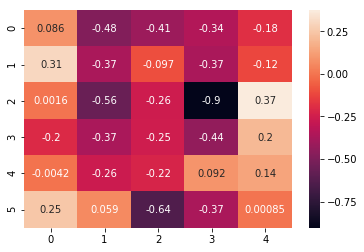

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.1913914  -0.07032959 -0.01581044 -0.01850363 -0.00104368]
[-0.11423842 -0.10033641  0.13298707  0.10921954 -0.0100876 ]
[-0.01272376  0.28241846 -0.0193504  -0.02499972  0.31864749]
[ 0.13327476 -0.09939315  0.29525667 -0.01973988 -0.06999144]
[ 0.09982671 -0.10079315  0.11921028 -0.00086837 -0.0066557 ]
[ 0.25575352  0.23828253  0.18765274  0.63034637  0.11765407]



['Bayes_R' 'Ada_B' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'SVM' 'ANN' 'Bayes_R']
['Ada_B' 'KNN' 'Bayes_R' 'Bayes_R' 'KNN']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'KNN']
['Ada_B' 'Bayes_R' 'ANN' 'ANN' 'Bayes_R']
['SVM' 'SVM' 'Lin_Reg' 'KNN' 'SVM']


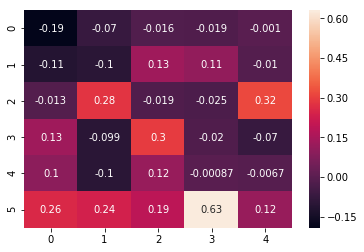

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.24747905 -0.28162957 -0.30875335 -0.63283213 -0.54092816]
[ -2.75028851e-01  -4.15987478e-02  -1.08532976e-01  -5.81381276e-01
   5.75799189e-05]
[-0.56903058  0.42093868 -0.0335571  -0.49389381  0.25166745]
[ 0.19181379 -0.0013176  -0.37856638 -0.456601    0.14219534]
[-0.01769513 -0.40825896 -0.39386248 -0.1733549   0.40500177]
[ -4.96518539e-02  -1.08294846e-01  -6.54192652e-01  -7.56790123e-02
   3.11082333e-04]



['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Ada_B']
['ANN' 'SVM' 'Bayes_R' 'KNN' 'Bayes_R']


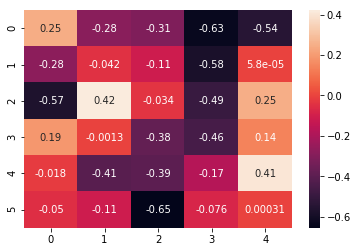

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.09913145 -0.13172663  0.25500381 -0.01738536  0.21822679]
[-0.15381588 -0.10006617  0.11618177 -0.01698864  0.02737262]
[-0.10587237 -0.09881571 -0.07930235  0.13943361  0.02817334]
[-0.04122726  0.00933855  0.00814566  0.2330051   0.02259251]
[-0.034879   -0.10199887  0.30630546 -0.01858445  0.09536526]
[ 0.1647897  -0.09912434  0.11837304  0.21331064  0.07260162]



['ANN' 'SVM' 'SVM' 'Bayes_R' 'KNN']
['Bayes_R' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Gauss_P' 'ANN' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'Lin_Reg' 'ANN' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Ada_B' 'Bayes_R' 'KNN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'ANN']


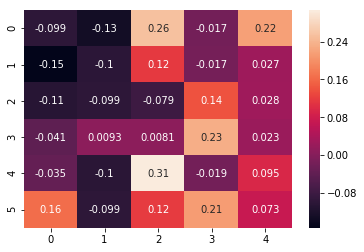

++++++++++
----------
Correlation threshold: 0.35
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08646738 -0.34697964 -0.40957199 -0.34169753 -0.00454728]
[ 0.28241408 -0.35638199 -0.28782864 -0.0947686  -0.11709592]
[ 0.00156911 -0.09335996 -0.31281437 -0.90449218  0.37359291]
[-0.19162435 -0.36893689 -0.37900832 -1.          0.13389081]
[ 0.00556172 -0.43278817 -0.22448754  0.09209877  0.14222793]
[ 0.25159095  0.05926012 -0.63825778 -0.36586916  0.18075821]



['Bayes_R' 'ANN' 'Bayes_R' 'KNN' 'Ada_B']
['Ada_B' 'Ada_B' 'Ada_B' 'Ada_B' 'Bayes_R']
['SVM' 'ANN' 'Ada_B' 'Bayes_R' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'Nan' 'Ada_B']
['ANN' 'Bayes_R' 'Bayes_R' 'KNN' 'Lin_Reg']
['KNN' 'KNN' 'ANN' 'Bayes_R' 'ANN']


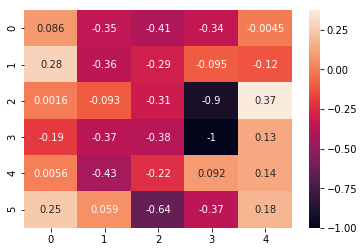

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.01922867 -0.10568587  0.13135054 -0.01850363 -0.00104368]
[-0.11423842 -0.10033641  0.21473564  0.06829572 -0.0100876 ]
[ 0.15216861  0.28241846 -0.01085504  0.132828    0.31864749]
[ 0.13327476 -0.09939315  0.29525667 -0.01973988 -0.06999144]
[-0.05288816 -0.10079315  0.09476636 -0.34494859  0.02999261]
[ 0.25575352  0.23828253  0.18765274  0.63034637  0.15050509]



['ANN' 'Ada_B' 'ANN' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'Ada_B' 'ANN' 'Bayes_R']
['Ada_B' 'KNN' 'ANN' 'ANN' 'KNN']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'KNN']
['Bayes_R' 'Bayes_R' 'Ada_B' 'Bayes_R' 'Ada_B']
['SVM' 'SVM' 'Lin_Reg' 'KNN' 'ANN']


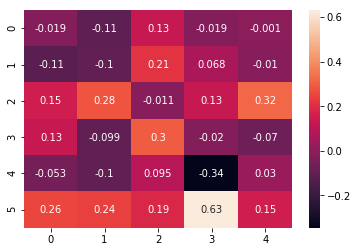

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.24256877 -0.27763056 -0.30875335 -0.63283213 -0.29715771]
[ -2.75028851e-01  -1.77943906e-01   1.94485544e-01  -5.81381276e-01
   5.75799189e-05]
[-0.5832371   0.42093868 -0.0335571  -0.54202276  0.25166745]
[ 0.29626362 -0.0013176  -0.37856638 -0.38522272  0.32266924]
[-0.05516862 -0.40825896 -0.39386248 -0.1733549   0.33350998]
[-0.04933058 -0.10829485 -0.44976286 -0.07567901  0.0287841 ]



['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'ANN']
['Bayes_R' 'ANN' 'Ada_B' 'Bayes_R' 'Bayes_R']
['KNN' 'SVM' 'KNN' 'Bayes_R' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'KNN']
['Ada_B' 'SVM' 'ANN' 'KNN' 'Ada_B']


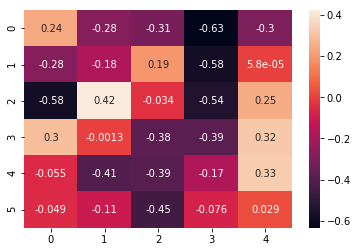

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.20336081 -0.13172663  0.25500381 -0.01738536  0.21822679]
[-0.15381588 -0.06556616  0.11618177 -0.01698864  0.06999697]
[-0.10587237  0.08861181 -0.07930235  0.12450932  0.02817334]
[-0.04122726  0.3595319  -0.01288338 -0.01692669 -0.01008433]
[-0.53430911 -0.10199887  0.30106763 -0.01858445  0.09536526]
[ 0.1647897   0.07362251  0.21591065  0.15803399  0.06664852]



['ANN' 'SVM' 'SVM' 'Bayes_R' 'KNN']
['Bayes_R' 'ANN' 'SVM' 'Bayes_R' 'ANN']
['Gauss_P' 'Ada_B' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'Bayes_R' 'ANN' 'Bayes_R' 'KNN']
['SVM' 'ANN' 'Ada_B' 'Bayes_R' 'ANN']


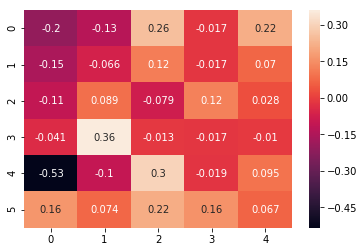

++++++++++
----------
Correlation threshold: 0.4
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08646738 -1.         -0.40957199 -0.34169753 -0.18448951]
[ 0.21234439 -0.36792328 -0.1136021  -0.36810877 -0.11709592]
[ 0.00156911 -0.15369119 -0.20777026 -0.90449218  0.37359291]
[ 0.01256713 -0.35012621 -0.37900832 -0.25644087  0.25785237]
[-0.00421076 -0.43278817 -0.22448754  0.09209877  0.14222793]
[ 0.3533342   0.05926012 -0.37579852 -0.36586916  0.00084559]



['Bayes_R' 'Nan' 'Bayes_R' 'KNN' 'Bayes_R']
['Ada_B' 'Bayes_R' 'Ada_B' 'Lin_Reg' 'Bayes_R']
['SVM' 'ANN' 'Ada_B' 'Bayes_R' 'SVM']
['ANN' 'ANN' 'Bayes_R' 'ANN' 'Ada_B']
['Bayes_R' 'Bayes_R' 'Bayes_R' 'KNN' 'Lin_Reg']
['Ada_B' 'KNN' 'ANN' 'Bayes_R' 'Bayes_R']


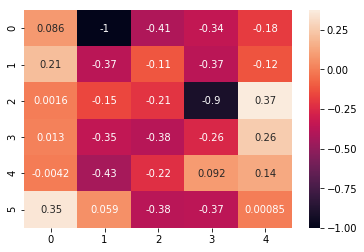

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.08336508 -0.16712209 -0.01581044  0.02303879 -0.00104368]
[-0.09767124 -0.10033641  0.17771819  0.0002568  -0.0100876 ]
[-0.09396224  0.28241846 -0.0193504   0.33117367  0.31864749]
[ 0.13327476  0.11781     0.29525667  0.13195499 -0.06999144]
[ 0.01749449 -0.10079315 -0.01872537 -0.07616284  0.1266566 ]
[ 0.25575352  0.23828253  0.18765274  0.63034637  0.11765407]



['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R']
['ANN' 'Bayes_R' 'Ada_B' 'SVM' 'Bayes_R']
['Bayes_R' 'KNN' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'ANN' 'Gauss_P' 'ANN' 'KNN']
['Ada_B' 'Bayes_R' 'Ada_B' 'ANN' 'ANN']
['SVM' 'SVM' 'Lin_Reg' 'KNN' 'SVM']


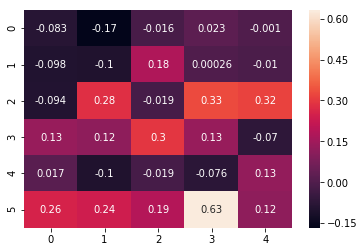

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.02786453 -0.37446887 -0.30875335 -0.63283213 -0.54092816]
[ -2.75028851e-01  -1.78886437e-01  -1.08532976e-01  -5.81381276e-01
   5.75799189e-05]
[-0.22722743  0.42093868 -0.0335571  -0.5049745   0.25166745]
[-0.00114466 -0.0013176  -0.37856638 -0.34241859  0.30718234]
[-0.09097499 -0.40825896 -0.38669931 -0.1733549   0.33350998]
[-0.15617832 -0.10829485 -0.65419265 -0.07567901  0.13433708]



['Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'ANN' 'Lin_Reg']
['ANN' 'SVM' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'ANN' 'Lin_Reg' 'KNN']
['KNN' 'SVM' 'Bayes_R' 'KNN' 'ANN']


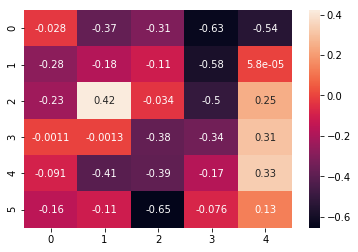

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.10449389 -0.09646083  0.01686246  0.06714933  0.05183055]
[-0.15110743 -0.10006617  0.11618177  0.37356452  0.04431592]
[-0.10587237 -0.05048231 -0.07930235  0.23454134  0.02817334]
[-0.04122726  0.09189532 -0.01288338 -0.01692669 -0.01008433]
[-0.15561842 -0.10199887  0.33737607 -0.01858445  0.10894456]
[ 0.1647897  -0.09912434  0.05526509  0.17906908  0.19885174]



['ANN' 'Bayes_R' 'ANN' 'SVM' 'SVM']
['ANN' 'Bayes_R' 'SVM' 'Ada_B' 'ANN']
['Gauss_P' 'ANN' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'Bayes_R' 'Ada_B' 'Bayes_R' 'ANN']
['SVM' 'Bayes_R' 'Ada_B' 'Ada_B' 'ANN']


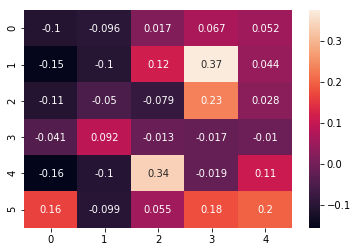

++++++++++
----------
**********
**********
Minimum correlation variables: 10
Correlation threshold: 0.3
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08808279 -0.73802525 -0.52831933 -0.72273982 -0.04698033]
[ 0.31413423 -0.26155839 -0.37836289 -0.19258814 -0.11369344]
[ 0.04377595 -0.20277819 -0.37230387 -0.88999719  0.23181114]
[-0.1937315  -0.0127158  -0.33466971 -0.03697286  0.14139392]
[ 0.1403993  -0.22852564 -0.23903108  0.16220132  0.27055089]
[ 0.063257    0.09520235 -0.63782842 -0.36757238  0.00070424]



['Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R' 'Ada_B']
['Ada_B' 'Ada_B' 'Bayes_R' 'ANN' 'Bayes_R']
['SVM' 'ANN' 'Ada_B' 'ANN' 'SVM']
['KNN' 'ANN' 'KNN' 'ANN' 'ANN']
['KNN' 'ANN' 'Bayes_R' 'Gauss_P' 'Ada_B']
['Ada_B' 'KNN' 'KNN' 'Bayes_R' 'Bayes_R']


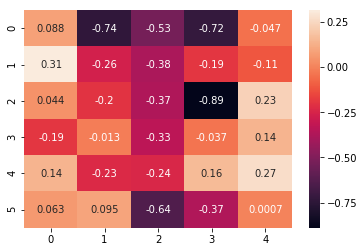

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.18627954 -0.19024627  0.23345706 -0.01858825  0.00336185]
[ 0.0228785  -0.10036366  0.19749394 -0.00276107 -0.01126614]
[-0.41570337 -0.0129397   0.14853152  0.27138901 -0.03653063]
[ 0.08099046 -0.09960493  0.34999312 -0.02013305  0.03339041]
[ 0.09086227 -0.07952889  0.04608453 -0.10489174 -0.00701111]
[ 0.31269118  0.02824748  0.29639327  0.78945815  0.02453867]



['Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R']
['KNN' 'Bayes_R' 'KNN' 'ANN' 'Bayes_R']
['Bayes_R' 'Ada_B' 'ANN' 'ANN' 'Bayes_R']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'KNN']
['Ada_B' 'Ada_B' 'KNN' 'ANN' 'Bayes_R']
['Ada_B' 'SVM' 'Ada_B' 'KNN' 'Bayes_R']


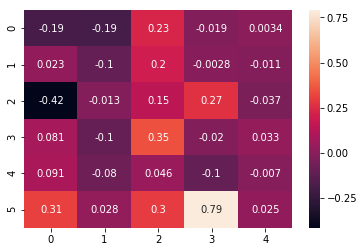

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.13736606 -0.07954012 -0.17475871 -0.50038713 -0.26755057]
[ -1.90460266e-01  -3.69335484e-01   1.81131903e-01  -5.65645211e-01
  -4.61421012e-04]
[-0.5832371   0.14503036 -0.0335571  -0.50518608  0.1037108 ]
[-0.10134083 -0.36843411 -0.21614307 -0.48981627  0.28556515]
[ 0.02233129 -0.40998287 -0.38580094  0.14290314  0.27870335]
[ 0.0797942  -0.10744696 -0.88569854 -0.50845193  0.20313113]



['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R']
['KNN' 'SVM' 'KNN' 'SVM' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'ANN']
['ANN' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'KNN']
['Ada_B' 'Ada_B' 'Bayes_R' 'Bayes_R' 'KNN']


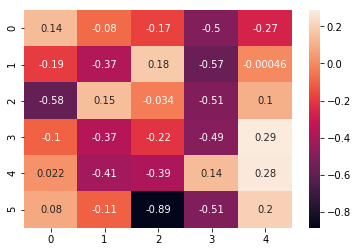

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.11319742 -0.16497618  0.09113847  0.20772107 -0.03856431]
[-0.06672024 -0.1000146   0.11640173 -0.01693858  0.0274495 ]
[-0.05395513 -0.06593039 -0.03401479 -0.01843551  0.05208328]
[ 0.07005307 -0.04317557 -0.01586847 -0.01729007  0.05572689]
[-0.15430365 -0.10117424  0.29435565  0.04689918  0.09536526]
[ 0.11114974 -0.09929465  0.27143678  0.22818527 -0.01000221]



['ANN' 'ANN' 'Lin_Reg' 'KNN' 'Bayes_R']
['ANN' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Gauss_P' 'Gauss_P' 'ANN' 'Bayes_R' 'ANN']
['KNN' 'Lin_Reg' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'Bayes_R' 'Ada_B' 'ANN' 'KNN']
['SVM' 'Bayes_R' 'KNN' 'Ada_B' 'Bayes_R']


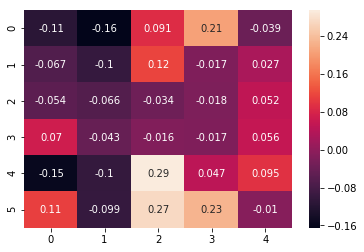

++++++++++
----------
Correlation threshold: 0.33
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08808279 -1.         -0.49909571 -0.72273982 -0.17720239]
[ 0.37791094 -0.36854026 -0.37836289 -0.24506121 -0.11369344]
[ 0.04377595 -0.60482504 -0.37400723 -0.89281778  0.23181114]
[-0.07927577  0.03300386 -0.33466971 -0.56156915  0.13179659]
[ 0.1403993  -0.40643021 -0.23903108  0.16220132  0.18411582]
[ 0.14030051  0.09520235 -0.63782842 -0.36757238  0.00070424]



['Bayes_R' 'Nan' 'Ada_B' 'Bayes_R' 'Bayes_R']
['Ada_B' 'Bayes_R' 'Bayes_R' 'Ada_B' 'Bayes_R']
['SVM' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'SVM']
['ANN' 'ANN' 'KNN' 'ANN' 'Ada_B']
['KNN' 'Bayes_R' 'Bayes_R' 'Gauss_P' 'Lin_Reg']
['Ada_B' 'KNN' 'KNN' 'Bayes_R' 'Bayes_R']


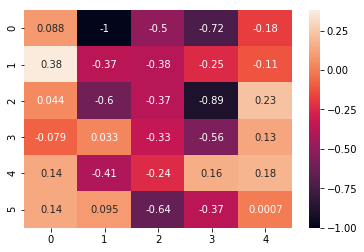

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.12073937 -0.19024627 -0.01567601  0.24653164  0.00336185]
[ 0.0228785  -0.10036366  0.26077168  0.00655971 -0.01126614]
[-0.3217495   0.2046953   0.21056015  0.21433853 -0.03653063]
[ 0.08099046 -0.09960493  0.34999312 -0.02013305  0.03339041]
[-0.03916424 -0.01846569  0.08607375 -0.01928466 -0.00701111]
[ 0.33855926  0.0975727   0.18152287  0.78945815  0.02453867]



['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R']
['KNN' 'Bayes_R' 'Ada_B' 'ANN' 'Bayes_R']
['Ada_B' 'Ada_B' 'ANN' 'ANN' 'Bayes_R']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'KNN']
['Ada_B' 'Ada_B' 'Ada_B' 'ANN' 'Bayes_R']
['Ada_B' 'ANN' 'Lin_Reg' 'KNN' 'Bayes_R']


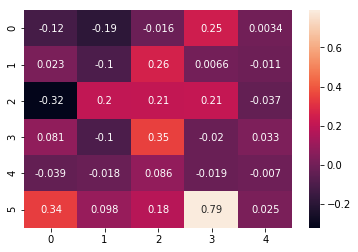

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.11282783 -0.12215283 -0.11547169 -0.50038713 -0.08270894]
[-0.2709917  -0.11352597  0.1811319  -0.41080678 -0.00046142]
[-0.33317046  0.14503036 -0.0335571  -0.50518608  0.1037108 ]
[-0.09604139 -0.36843411 -0.15231747 -0.29697064  0.00044413]
[-0.03446226 -0.21739436 -0.25782765  0.14290314  0.27870335]
[-0.04430688 -0.12845151 -0.88569854 -0.50845193  0.20313113]



['Ada_B' 'ANN' 'Ada_B' 'Bayes_R' 'ANN']
['Bayes_R' 'ANN' 'KNN' 'ANN' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'SVM' 'SVM']
['ANN' 'Bayes_R' 'ANN' 'ANN' 'Bayes_R']
['ANN' 'Ada_B' 'ANN' 'Lin_Reg' 'KNN']
['Ada_B' 'SVM' 'Bayes_R' 'Bayes_R' 'KNN']


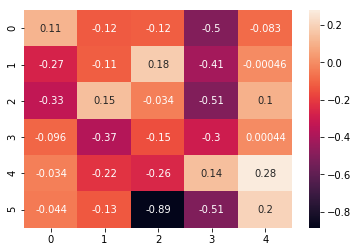

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.10119245 -0.20096885  0.25587621  0.04322323 -0.01659091]
[-0.16650492 -0.05469108  0.11640173 -0.01693858  0.03722477]
[-0.07177316  0.09080387 -0.08657891 -0.01835958  0.02817334]
[ 0.07005307  0.027464   -0.01586847  0.02827988  0.05572689]
[-0.32241517 -0.10117424  0.22663644 -0.00869289  0.09536526]
[ 0.1845434  -0.08779866  0.27143678  0.25784142  0.0879801 ]



['ANN' 'Bayes_R' 'SVM' 'ANN' 'ANN']
['Bayes_R' 'Ada_B' 'SVM' 'Bayes_R' 'ANN']
['Gauss_P' 'Gauss_P' 'Bayes_R' 'Bayes_R' 'KNN']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'KNN']
['ANN' 'Bayes_R' 'Ada_B' 'ANN' 'KNN']
['Ada_B' 'ANN' 'KNN' 'Ada_B' 'ANN']


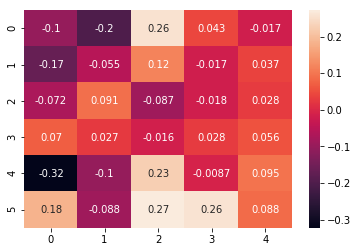

++++++++++
----------
Correlation threshold: 0.35
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08808279 -0.11642765 -0.52831933 -0.72273982 -0.17720239]
[ 0.23038003 -0.24519253 -0.37836289 -0.36353117 -0.11369344]
[ 0.04377595 -0.52284102 -0.35261082 -0.89281778  0.23181114]
[ 0.00884043 -0.36900836 -0.33466971 -0.78508289  0.32911835]
[ 0.1403993  -0.40643021 -0.23903108  0.16220132  0.18411582]
[ 0.08670291  0.09520235 -0.63782842 -0.36757238  0.02698365]



['Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'ANN' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['SVM' 'ANN' 'Ada_B' 'Bayes_R' 'SVM']
['ANN' 'Bayes_R' 'KNN' 'ANN' 'Ada_B']
['KNN' 'Bayes_R' 'Bayes_R' 'Gauss_P' 'Lin_Reg']
['Ada_B' 'KNN' 'KNN' 'Bayes_R' 'ANN']


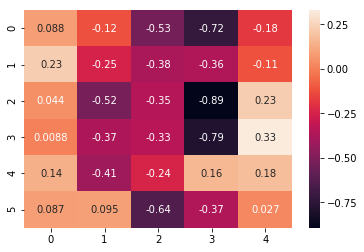

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.05796224 -0.19024627 -0.00573377 -0.01858825  0.00336185]
[ 0.0228785  -0.10036366  0.19749394  0.23450091 -0.01126614]
[-0.34614038  0.10369005  0.14125359 -0.02431535 -0.03653063]
[ 0.08099046 -0.09960493  0.34999312 -0.02013305  0.03339041]
[ 0.01390063 -0.10098354  0.04608453 -0.25275137  0.02421496]
[ 0.27693108  0.02824748  0.18152287  0.78945815  0.02453867]



['ANN' 'Bayes_R' 'ANN' 'Bayes_R' 'Bayes_R']
['KNN' 'Bayes_R' 'KNN' 'ANN' 'Bayes_R']
['Ada_B' 'Ada_B' 'ANN' 'Bayes_R' 'Bayes_R']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'KNN']
['Ada_B' 'Bayes_R' 'KNN' 'ANN' 'ANN']
['KNN' 'SVM' 'Lin_Reg' 'KNN' 'Bayes_R']


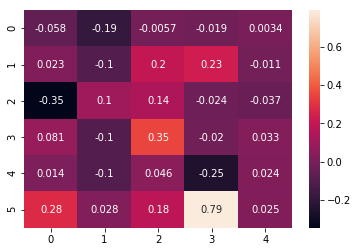

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.16900463 -0.3734303  -0.17475871 -0.50038713 -0.26755057]
[ -2.70991702e-01  -3.69335484e-01   1.81131903e-01  -5.65645211e-01
  -4.61421012e-04]
[ 0.11732557  0.14503036 -0.0335571  -0.50518608  0.1037108 ]
[ 0.08189559 -0.36843411 -0.37854195 -0.62925318  0.21346153]
[-0.12085726 -0.36715135 -0.38580094  0.14290314  0.27870335]
[-0.15587192 -0.12845151 -0.88569854 -0.50845193  0.20313113]



['Ada_B' 'Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R']
['Bayes_R' 'Bayes_R' 'KNN' 'Bayes_R' 'Bayes_R']
['ANN' 'SVM' 'KNN' 'SVM' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'ANN']
['ANN' 'Ada_B' 'Bayes_R' 'Lin_Reg' 'KNN']
['Bayes_R' 'SVM' 'Bayes_R' 'Bayes_R' 'KNN']


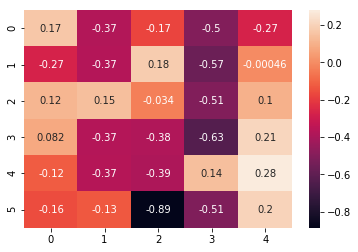

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.0758619  -0.14217682  0.22712233 -0.01718279  0.21822679]
[-0.07777691 -0.1000146   0.11640173 -0.01693858  0.11714827]
[-0.07177316  0.09080387 -0.08657891 -0.01025926  0.02817334]
[ 0.07005307 -0.04317557 -0.01586847 -0.01729007  0.05572689]
[-0.20201823 -0.10117424  0.18615562  0.10987855  0.09536526]
[ 0.113426   -0.04613248  0.27143678  0.15445511 -0.01000221]



['ANN' 'SVM' 'SVM' 'Bayes_R' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'Bayes_R' 'ANN']
['Gauss_P' 'Gauss_P' 'Bayes_R' 'ANN' 'KNN']
['KNN' 'Lin_Reg' 'Bayes_R' 'Bayes_R' 'KNN']
['ANN' 'Bayes_R' 'SVM' 'ANN' 'KNN']
['Ada_B' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']


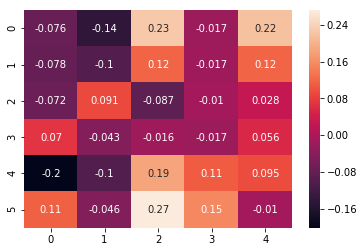

++++++++++
----------
Correlation threshold: 0.4
----------
++++++++++
Only variables close to normal distribution: True

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.08808279 -1.         -0.52831933 -0.72273982 -0.17720239]
[ 0.44786947 -0.36854026 -0.37836289 -0.36353117 -0.11369344]
[ 0.04377595 -0.29865814 -0.37400723 -0.89281778  0.23181114]
[-0.10458344 -0.05927563 -0.14963946 -0.43620934  0.40264658]
[ 0.1403993  -0.40643021 -0.22286807  0.16220132  0.18411582]
[ 0.11637137  0.09520235 -0.63782842 -0.36757238  0.00070424]



['Bayes_R' 'Nan' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['Ada_B' 'Bayes_R' 'Bayes_R' 'Lin_Reg' 'Bayes_R']
['SVM' 'ANN' 'Bayes_R' 'Bayes_R' 'SVM']
['ANN' 'ANN' 'ANN' 'ANN' 'Ada_B']
['KNN' 'Bayes_R' 'ANN' 'Gauss_P' 'Lin_Reg']
['Ada_B' 'KNN' 'KNN' 'Bayes_R' 'Bayes_R']


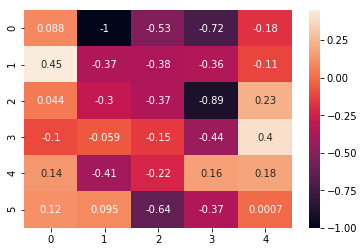

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.17360793 -0.19024627 -0.01567601 -0.01858825  0.00336185]
[ 0.0228785  -0.10036366  0.21119075  0.24047858 -0.01126614]
[-0.14614474  0.01447526  0.05603448 -0.02431535  0.13432711]
[ 0.08099046 -0.09960493  0.34999312 -0.02013305  0.03339041]
[ 0.13784399 -0.10098354  0.04608453 -0.18897182 -0.00701111]
[ 0.27693108  0.02824748  0.18152287  0.78945815  0.07964014]



['ANN' 'Bayes_R' 'Bayes_R' 'Bayes_R' 'Bayes_R']
['KNN' 'Bayes_R' 'Ada_B' 'ANN' 'Bayes_R']
['Ada_B' 'Ada_B' 'KNN' 'Bayes_R' 'ANN']
['KNN' 'Bayes_R' 'Gauss_P' 'Bayes_R' 'KNN']
['Ada_B' 'Bayes_R' 'KNN' 'ANN' 'Bayes_R']
['KNN' 'SVM' 'Lin_Reg' 'KNN' 'ANN']


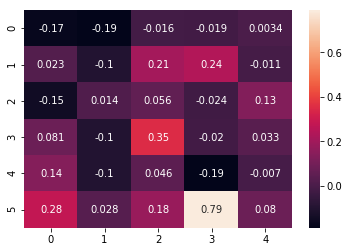

++++++++++
++++++++++
Only variables close to normal distribution: False

Random seed: 42

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[ 0.10706788  0.28162579 -0.12880604 -0.50038713  0.09023469]
[ -2.46366050e-01  -1.98005341e-01   1.81131903e-01  -5.65645211e-01
  -4.61421012e-04]
[-0.5832371   0.14503036 -0.0335571  -0.50518608  0.1037108 ]
[ -9.62757951e-02  -3.68434114e-01  -3.78541946e-01  -9.20195523e-01
   4.44125385e-04]
[-0.22080006 -0.1546749  -0.34614336  0.14290314  0.27870335]
[-0.05021    -0.12845151 -0.84553327 -0.50845193  0.20313113]



['Ada_B' 'ANN' 'Ada_B' 'Bayes_R' 'ANN']
['ANN' 'ANN' 'KNN' 'Bayes_R' 'Bayes_R']
['KNN' 'SVM' 'KNN' 'SVM' 'SVM']
['ANN' 'Bayes_R' 'Bayes_R' 'ANN' 'Bayes_R']
['Bayes_R' 'Ada_B' 'ANN' 'Lin_Reg' 'KNN']
['ANN' 'SVM' 'ANN' 'Bayes_R' 'KNN']


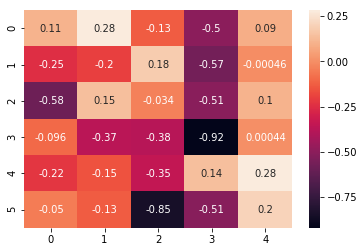

Random seed: 1

['extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness_to_experience']
[-0.1893045  -0.09743771 -0.02874745  0.06605612  0.05214023]
[-0.16650492 -0.1000146   0.11640173  0.15705465 -0.00931386]
[-0.07177316  0.09080387 -0.08657891 -0.01835958  0.11836769]
[ 0.07005307 -0.03261198 -0.01586847  0.01827167  0.05572689]
[-0.23949074 -0.10117424  0.27838906 -0.01855479  0.09536526]
[ 0.11114974 -0.09929465  0.27143678  0.15445511  0.07083227]



['ANN' 'Bayes_R' 'ANN' 'ANN' 'SVM']
['Bayes_R' 'Bayes_R' 'SVM' 'ANN' 'Bayes_R']
['Gauss_P' 'Gauss_P' 'Bayes_R' 'Bayes_R' 'ANN']
['KNN' 'ANN' 'Bayes_R' 'ANN' 'KNN']
['Ada_B' 'Bayes_R' 'Ada_B' 'Bayes_R' 'KNN']
['SVM' 'Bayes_R' 'KNN' 'Bayes_R' 'ANN']


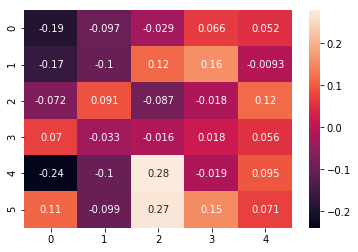

++++++++++
----------
**********


In [18]:
for n_vars in n_min_corr_vars:
    print '*'*10
    print 'Minimum correlation variables: {0}'.format(n_vars)
    for threshold in thresholds:
        print 'Correlation threshold: {0}'.format(threshold)
        print '-'*10
        for only_normal_dis in only_normal_dist:
            print '+'*10
            print 'Only variables close to normal distribution: {0}\n'.format(only_normal_dis)
            print 'Random seed: {0}\n'.format(42)
            models_dict = regression_per_task.main(path_to_pickle=path_to_pickle,
                                 test_size = test_size,
                                 print_extended=False,
                                 pca=False,
                                 variance_features = None,
                                 correlation_features=threshold,
                                 n_min_corr_vars=n_vars,
                                 only_normal_distributed = only_normal_dis,
                                 random_seed=42)
            print 'Random seed: {0}\n'.format(1)
            models_dict2 = regression_per_task.main(path_to_pickle=path_to_pickle,
                                 test_size = test_size,
                                 print_extended=False,
                                 pca=False,
                                 variance_features = None,
                                 correlation_features=threshold,
                                 n_min_corr_vars=n_vars,
                                 only_normal_distributed = only_normal_dis,
                                 random_seed=1)
            print '+'*10
        print '-'*10
    print '*'*10